## **Business Problem**

This data-driven project aims to derive actionable insights to enhance customer retention by focusing on high-value customers and identifying churn risks. The primary concern is the alarming customer churn rate faced by the company, leading to significant revenue loss. A higher churn rate indicates a critical issue that requires an in-depth analysis to uncover the underlying causes and patterns.

To better understand customer churn in the Telecom Company, a detailed analytical approach will be used.

First, a comprehensive examination of the dataset will shed light on factors such as customer demographics, service tenure, billing patterns, common subscriptions, preferred offers, and additional services demanded. Along with this, data visualization will play a key role. By using various graphs and charts, we can better understand the reasons behind the higher churn rates. These visualizations will meticulously highlight trends within the dataset for different customer segments, helping stakeholders to better understand customer behavior.

Lastly, to ensure that our findings are grounded in solid evidence, we will apply statistical tools, including t-tests and regression analyses, to validate our insights and further explore the factors driving customer churn.

In [1]:
import sys
print(sys.version)

3.12.1 (main, Sep 30 2024, 17:05:21) [GCC 9.4.0]


### **Importing Modules and Loading Data**

In [2]:
# Data Loading and Manipulation modules
import pandas as pd
import numpy as np

# Machine learning and metrics modules.
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Visualisation Modules and Set the 'ggplot' style
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('Customer Churn.csv') #load data
df.head() # print 5 rows of data

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Checking Columns in the dataset

In [4]:
df.columns # data columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

Prints the unique values for each categorical column in the given DataFrame.

In [5]:
def print_unique_values(df): # print uniques values of categorical columns
    for col in df:
        # Check if the column's data type is 'object' (categorical)
        if df[col].dtype == 'object':
            # Print the column name and its unique values
            unique_vals = df[col].unique()
            print(f"{col}: {unique_vals}")

In [ ]:
print_unique_values(df)

Customer ID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Gender: ['Female' 'Male']
Married: ['Yes' 'No']
City: ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
Offer: [nan 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes' nan]
Internet Service: ['Yes' 'No']
Internet Type: ['Cable' 'Fiber Optic' 'DSL' nan]
Online Security: ['No' 'Yes' nan]
Online Backup: ['Yes' 'No' nan]
Device Protection Plan: ['No' 'Yes' nan]
Premium Tech Support: ['Yes' 'No' nan]
Streaming TV: ['Yes' 'No' nan]
Streaming Movies: ['No' 'Yes' nan]
Streaming Music: ['No' 'Yes' nan]
Unlimited Data: ['Yes' 'No' nan]
Contract: ['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status: ['Stayed' 'Churned' 'Joined']
Churn Category: [nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']
Chur

In [7]:
df.describe() # statistical Summary of the data

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [8]:
df.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

#### **Checking and Visualize Null or Missing Values**

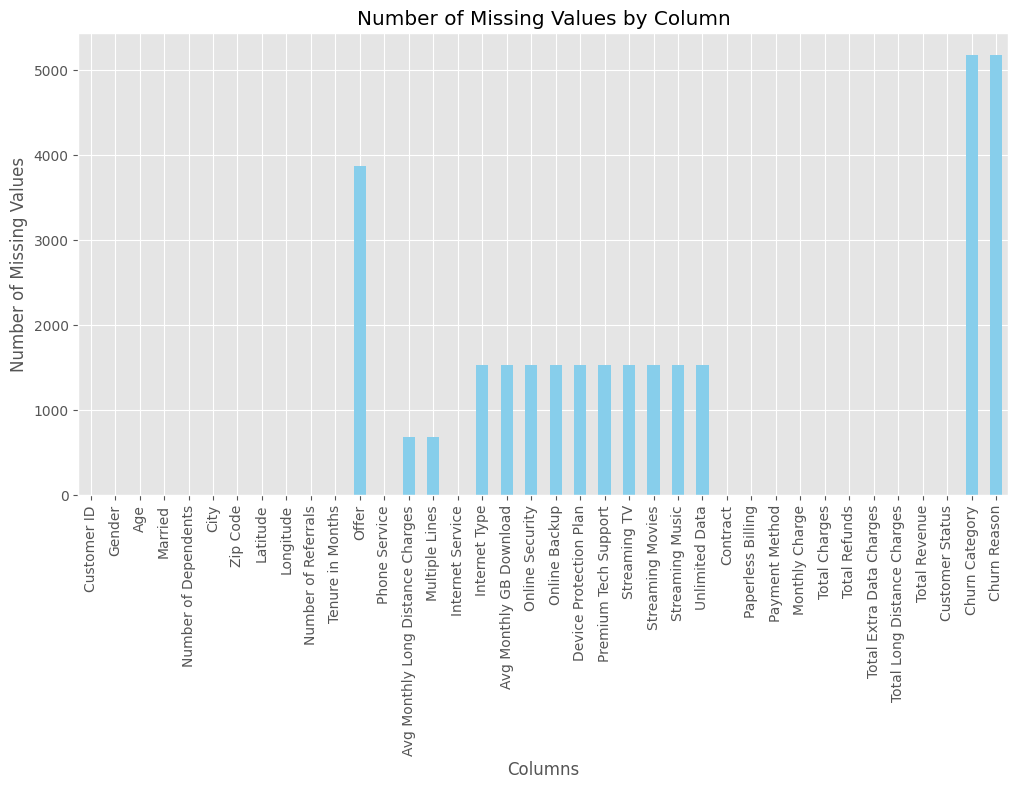

In [9]:
# Count the number of missing values
missing_values_count = df.isnull().sum()

# Create a bar chart to visualize missing values
plt.figure(figsize=(12, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

**Dealing with missing Values**

In [10]:
# Dealing with missing values for specified columns
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean())
df['Multiple Lines'] = df['Multiple Lines'].fillna('No')
df['Internet Type'] = df['Internet Type'].fillna('None')
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(df['Avg Monthly GB Download'].mean())
df['Online Security'] = df['Online Security'].fillna('No')
df['Online Backup'] = df['Online Backup'].fillna('No')
df['Device Protection Plan'] = df['Device Protection Plan'].fillna('No')
df['Premium Tech Support'] = df['Premium Tech Support'].fillna('No')
df['Streaming TV'] = df['Streaming TV'].fillna('No')
df['Streaming Movies'] = df['Streaming Movies'].fillna('No')
df['Streaming Music'] = df['Streaming Music'].fillna('No')
df['Unlimited Data'] = df['Unlimited Data'].fillna('No')
df['Churn Category'] = df['Churn Category'].fillna('Other')
# df['Churn Reason'] = df['Churn Reason'].fillna('Other')

### **Checking Duplicate Values**

In [ ]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 0


### **Checking for Outliers**
detecting outliers

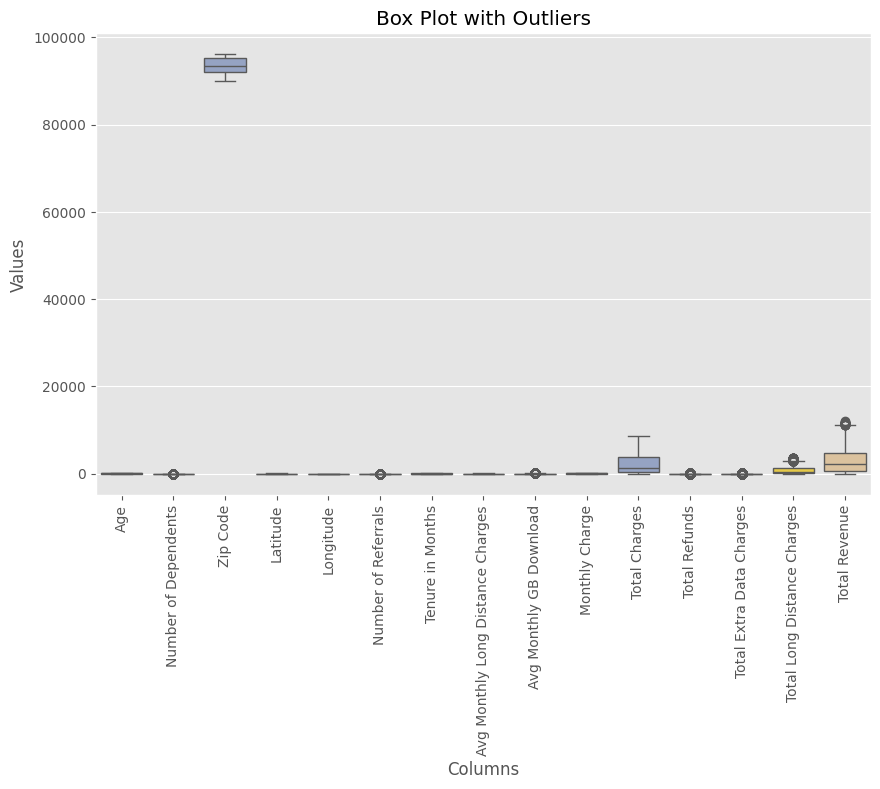

In [12]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette='Set2')
plt.title('Box Plot with Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

##### There are no prominent specific outliers that might ocould affect the overall analysis, so we'll proceed further with the analysis.

## **Visualisations and Analysis**

#### **The Problem**

Total Revenue: 21371131.69
|-------------------------------------|

Total Customers: 7043
|-------------------------------------|

Revenue by Customer Status:


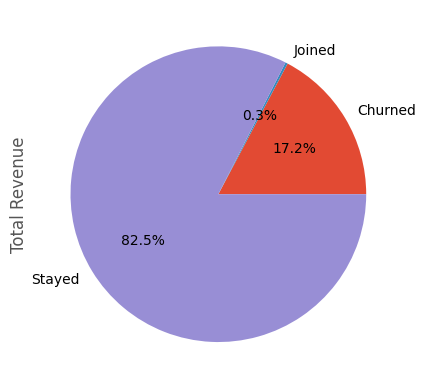

Customer Status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: Total Revenue, dtype: float64
|-------------------------------------|

Count by Customer Status:


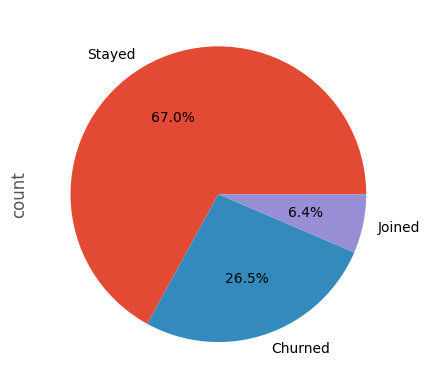

Customer Status
Churned    1869
Joined      454
Stayed     4720
dtype: int64


In [13]:
total_revenue_sum = df['Total Revenue'].sum()
print("Total Revenue:", total_revenue_sum)
print('|-------------------------------------|\n')
customer_status_count = df['Customer Status'].count()

print("Total Customers:", customer_status_count)
print('|-------------------------------------|\n')
print("Revenue by Customer Status:")
revenue_by_status = df.groupby(['Customer Status'])['Total Revenue'].sum()
df.groupby(['Customer Status'])['Total Revenue'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.show()
print(revenue_by_status)
print('|-------------------------------------|\n')
count_by_status = df.groupby(['Customer Status']).size()
print("Count by Customer Status:")
df['Customer Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()
print(count_by_status)

The data highlights concerning financial and customer trends for the company. The company experienced a significant revenue loss of 3.68 million USD, which makes up roughly 17.2% of its entire revenue. This monetary setback is paralleled by a substantial customer churn. The customer churn rate stands at 26.5%, signifying that the company lost 1,869 of its 7,043 customers according to this data.

### **Why Customer Churn?**

<Axes: >

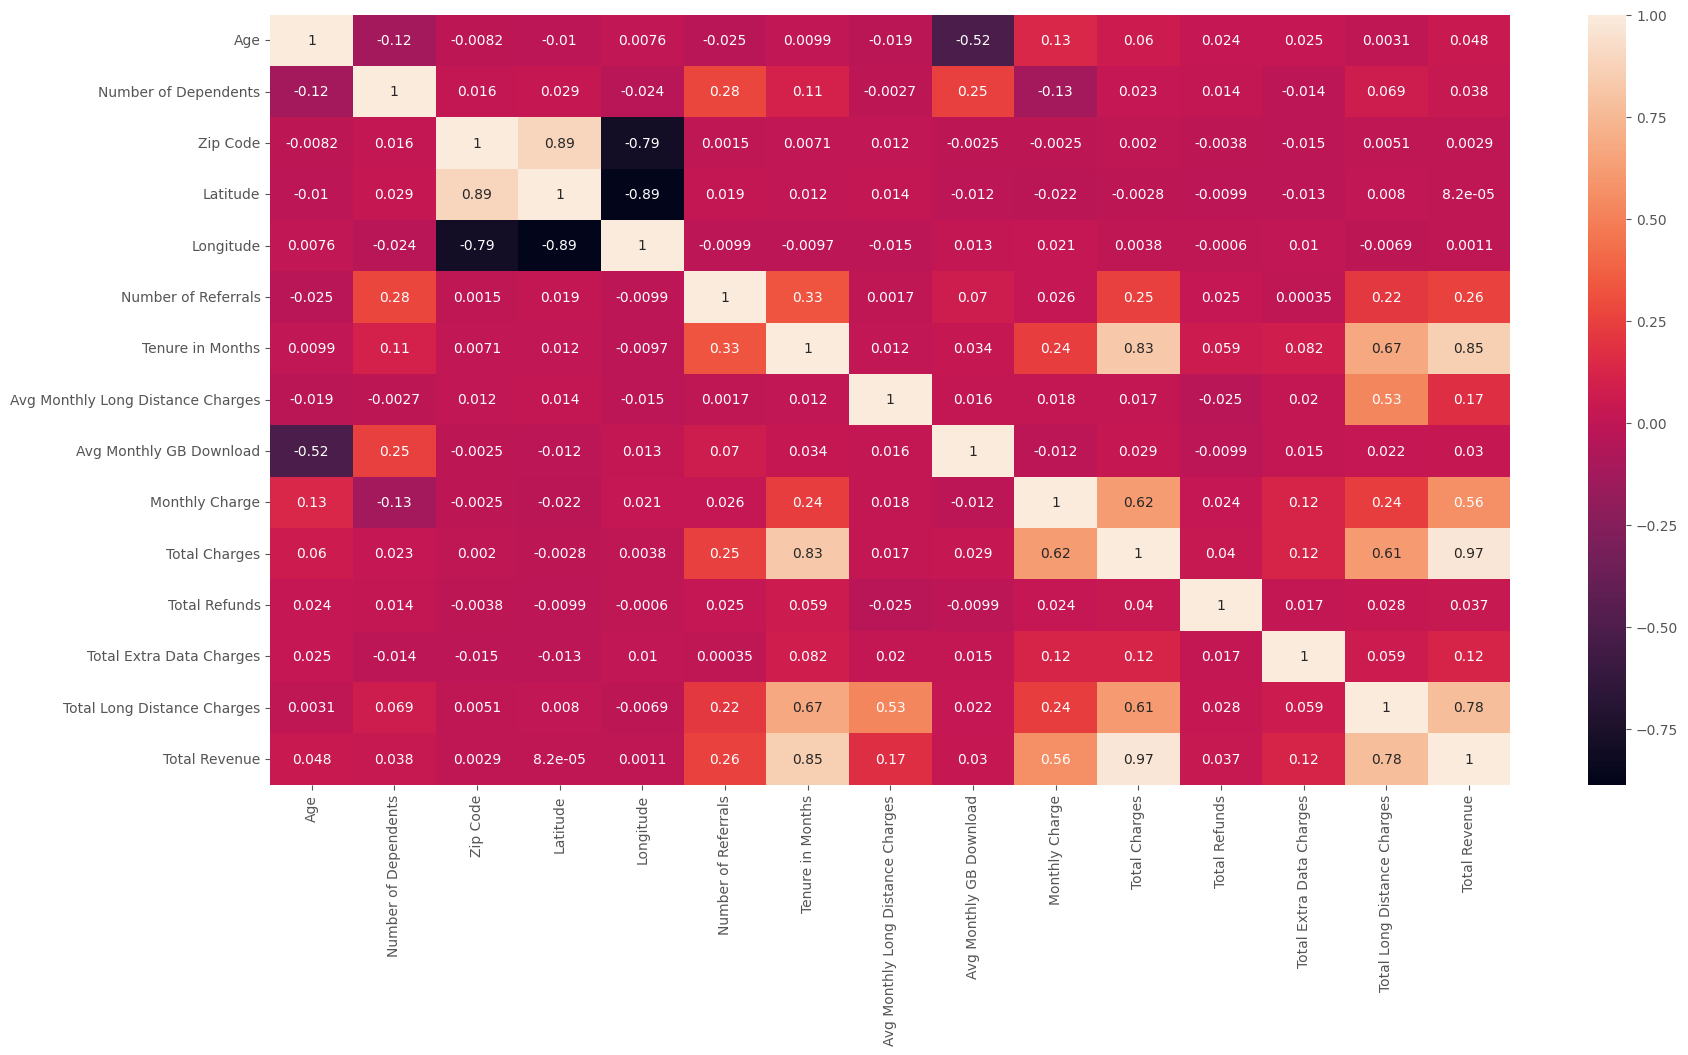

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
df.groupby('Customer Status')['Monthly Charge'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,73.347592,26.373764,-10.0,55.3000,79.500,94.20,118.35
Joined,454.0,42.775991,24.612329,-8.0,20.1625,43.975,64.35,107.95
Stayed,4720.0,61.737415,32.198758,-10.0,25.1000,65.600,89.55,118.75


- `Churned customers` have a `higher mean monthly charge (73.35)` compared to `Joined customers (42.78)` and `Stayed customers (61.74)`. This suggests that customers who churn tend to have higher monthly charges.

In [ ]:
df.groupby(['Customer Status','Gender'])['Monthly Charge'].describe()

count       mean        std   min      25%     50%  \
Customer Status Gender                                                        
Churned         Female   939.0  73.606656  26.093400 -10.0  59.6250  79.500   
                Male     930.0  73.086022  26.665339  -9.0  53.8750  79.500   
Joined          Female   211.0  43.374645  23.839314  -8.0  20.2250  44.000   
                Male     243.0  42.256173  25.301925  -8.0  20.1000  43.850   
Stayed          Female  2338.0  62.343926  32.085856 -10.0  25.2500  65.625   
                Male    2382.0  61.142107  32.304853 -10.0  25.0125  65.550   

                           75%     max  
Customer Status Gender                  
Churned         Female  93.625  117.45  
                Male    94.500  118.35  
Joined          Female  69.225   95.85  
                Male    60.800  107.95  
Stayed          Female  89.750  118.75  
                Male    89.375  118.20

- The `mean monthly charges` for both genders within each customer status category are relatively similar.

In [17]:
df.groupby(['Customer Status'])['Tenure in Months'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0
Joined,454.0,1.720264,0.818486,1.0,1.0,1.0,2.0,3.0
Stayed,4720.0,41.041525,22.363674,4.0,21.0,42.0,63.0,72.0


- `Churned customers` have an average tenure of approximately `18 months`, with a relatively high standard deviation of 19.53 months. The minimum tenure is 1 month, while the maximum tenure is 72 months.
- `Joined customers `have an average tenure of around `1.72 months`, with a lower standard deviation of 0.82 months. The majority of joined customers have a tenure of 1 month, with a maximum tenure of 3 months.
- `Stayed customers` have a significantly longer average tenure of approximately `41 months`, with a standard deviation of 22.36 months. The minimum tenure is 4 months, while the maximum tenure is 72 months.

<Axes: xlabel='Tenure in Months', ylabel='Monthly Charge'>

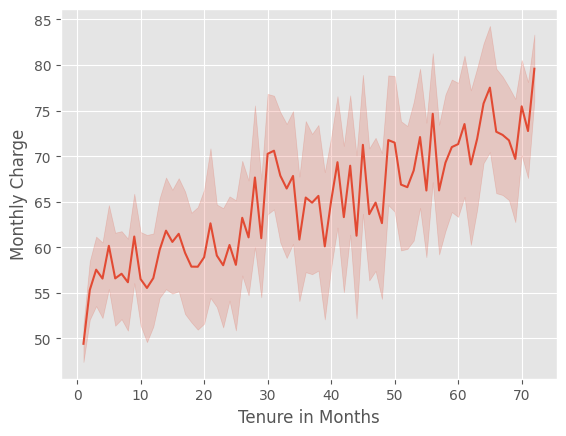

In [18]:
sns.lineplot(x='Tenure in Months',y='Monthly Charge', data=df)

- As the `tenure in months increases`, there is an overall trends for the `monthly charges increasing`.

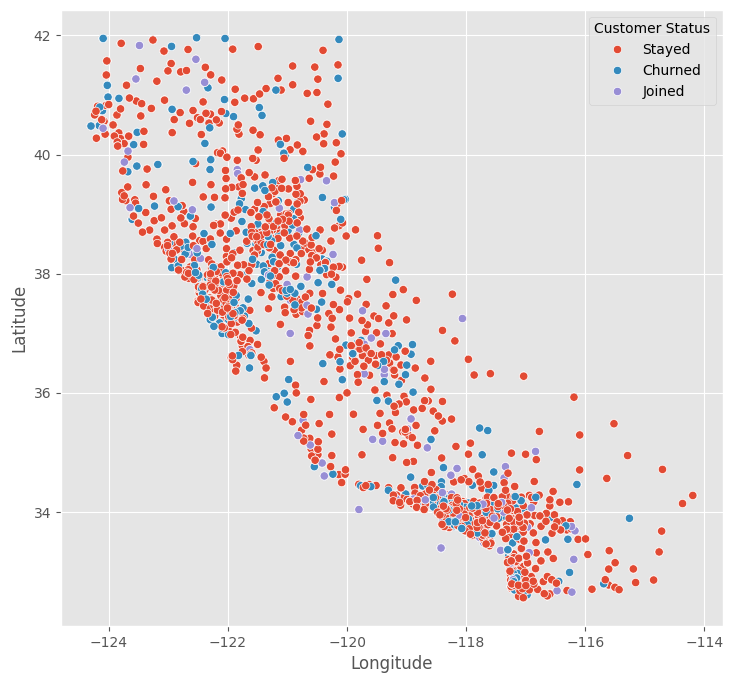

In [19]:
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Customer Status')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 8)
plt.show()

In [20]:
churned = df.loc[df['Customer Status'] != 'Joined']

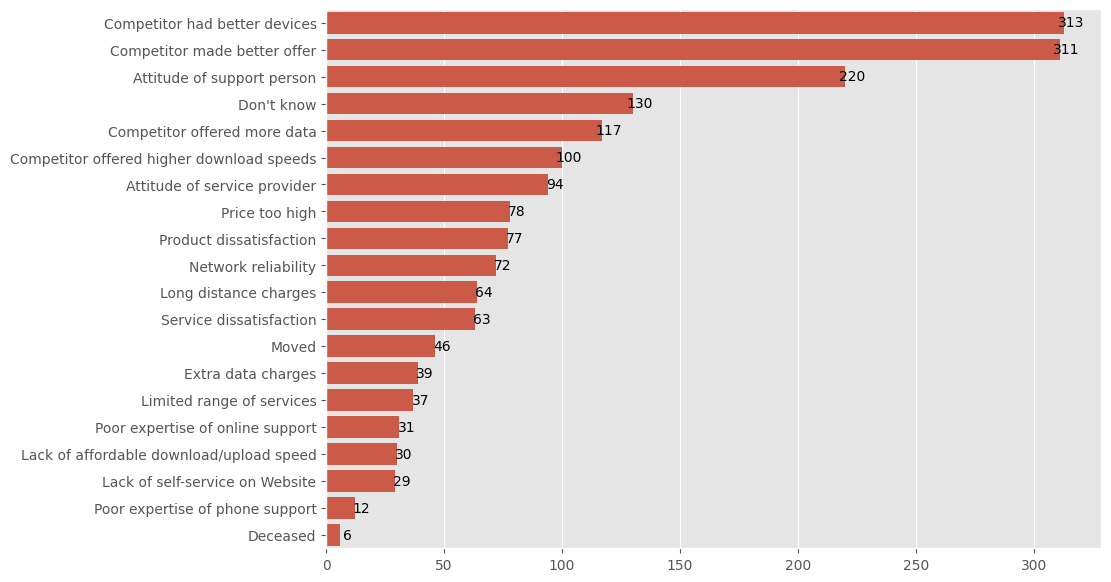

In [21]:
fig = plt.figure(figsize = (10, 7))
ax = sns.countplot(data = churned, y = churned['Churn Reason'], order = churned['Churn Reason'].value_counts().index)
ax.set(xlabel = None, ylabel = None)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

**Insights**

- The most common reason for churn is that a `competitor had better devices`, with a count of 313. This suggests that device quality plays a significant role in customer decision-making.
- The second most prevalent reason is that a `competitor made a better offer`, with a count of 311. This indicates that pricing and promotional incentives from competitors impact customer churn.
- The `attitude of support persons` and `service providers` also contributes to churn, as evidenced by the significant counts of 220 and 94, respectively. This highlights the importance of quality customer service.
- It's interesting to note that a small number of customers churn due to reasons like being deceased or lack of expertise in phone or online support.

This information can be used to identify areas for improvement, such as enhancing device quality, refining pricing strategies, addressing customer service concerns, and focusing on product satisfaction and network reliability. Taking actions based on these insights can help reduce customer churn and enhance overall customer satisfaction and retention.

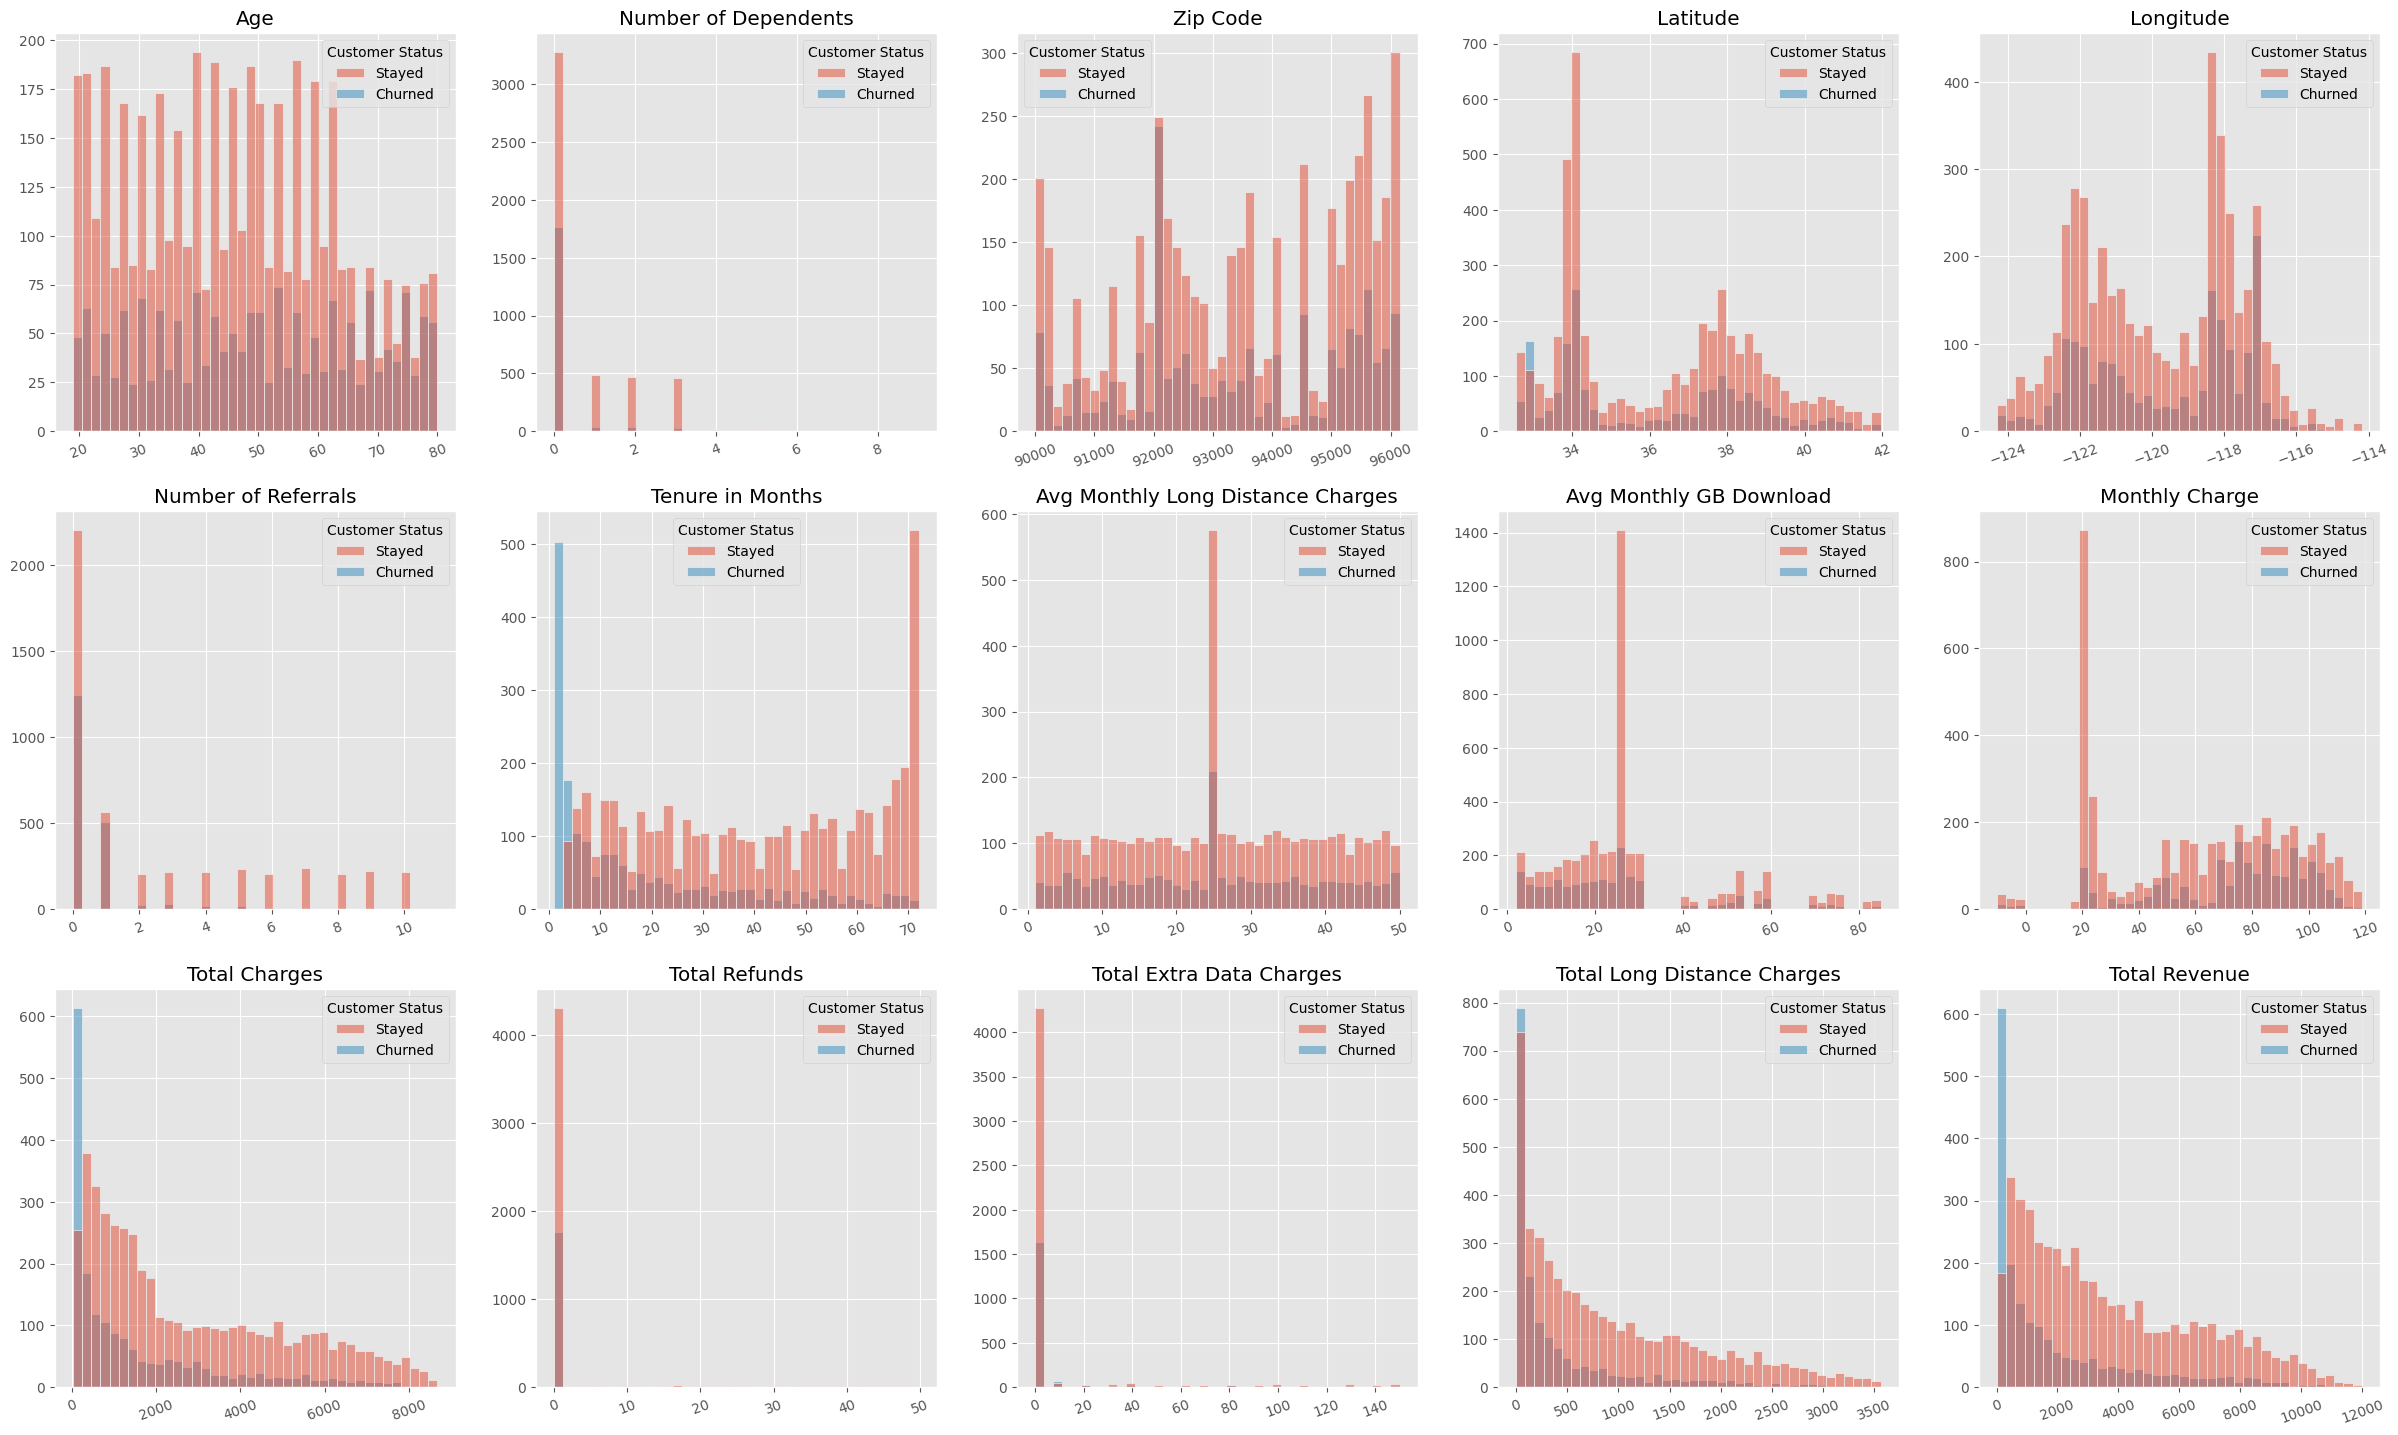

In [22]:
numerical = [column for column in churned.columns if churned[column].dtype in ['int64', 'float64']]
churned_num = churned[numerical]

fig = plt.figure(figsize = (30, 30))

i = 1
for n in churned_num.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = churned[n], hue = churned['Customer Status'], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

**Insights**
- `Tenure in Months:` The graph suggests that customer churn rate is highest within the first few months (5-10) of subscribing to the service. This indicates that customers are more likely to churn shortly after signing up. It highlights the importance of implementing strategies to engage and retain new customers during the initial phase of their subscription.
- `Total Charges and Revenue:` The graph also indicate that churned customers, despite their short duration of subscription, have relatively low total charges compared to customers who stayed. This implies that churned customers might not have fully utilized or paid for the services provided.

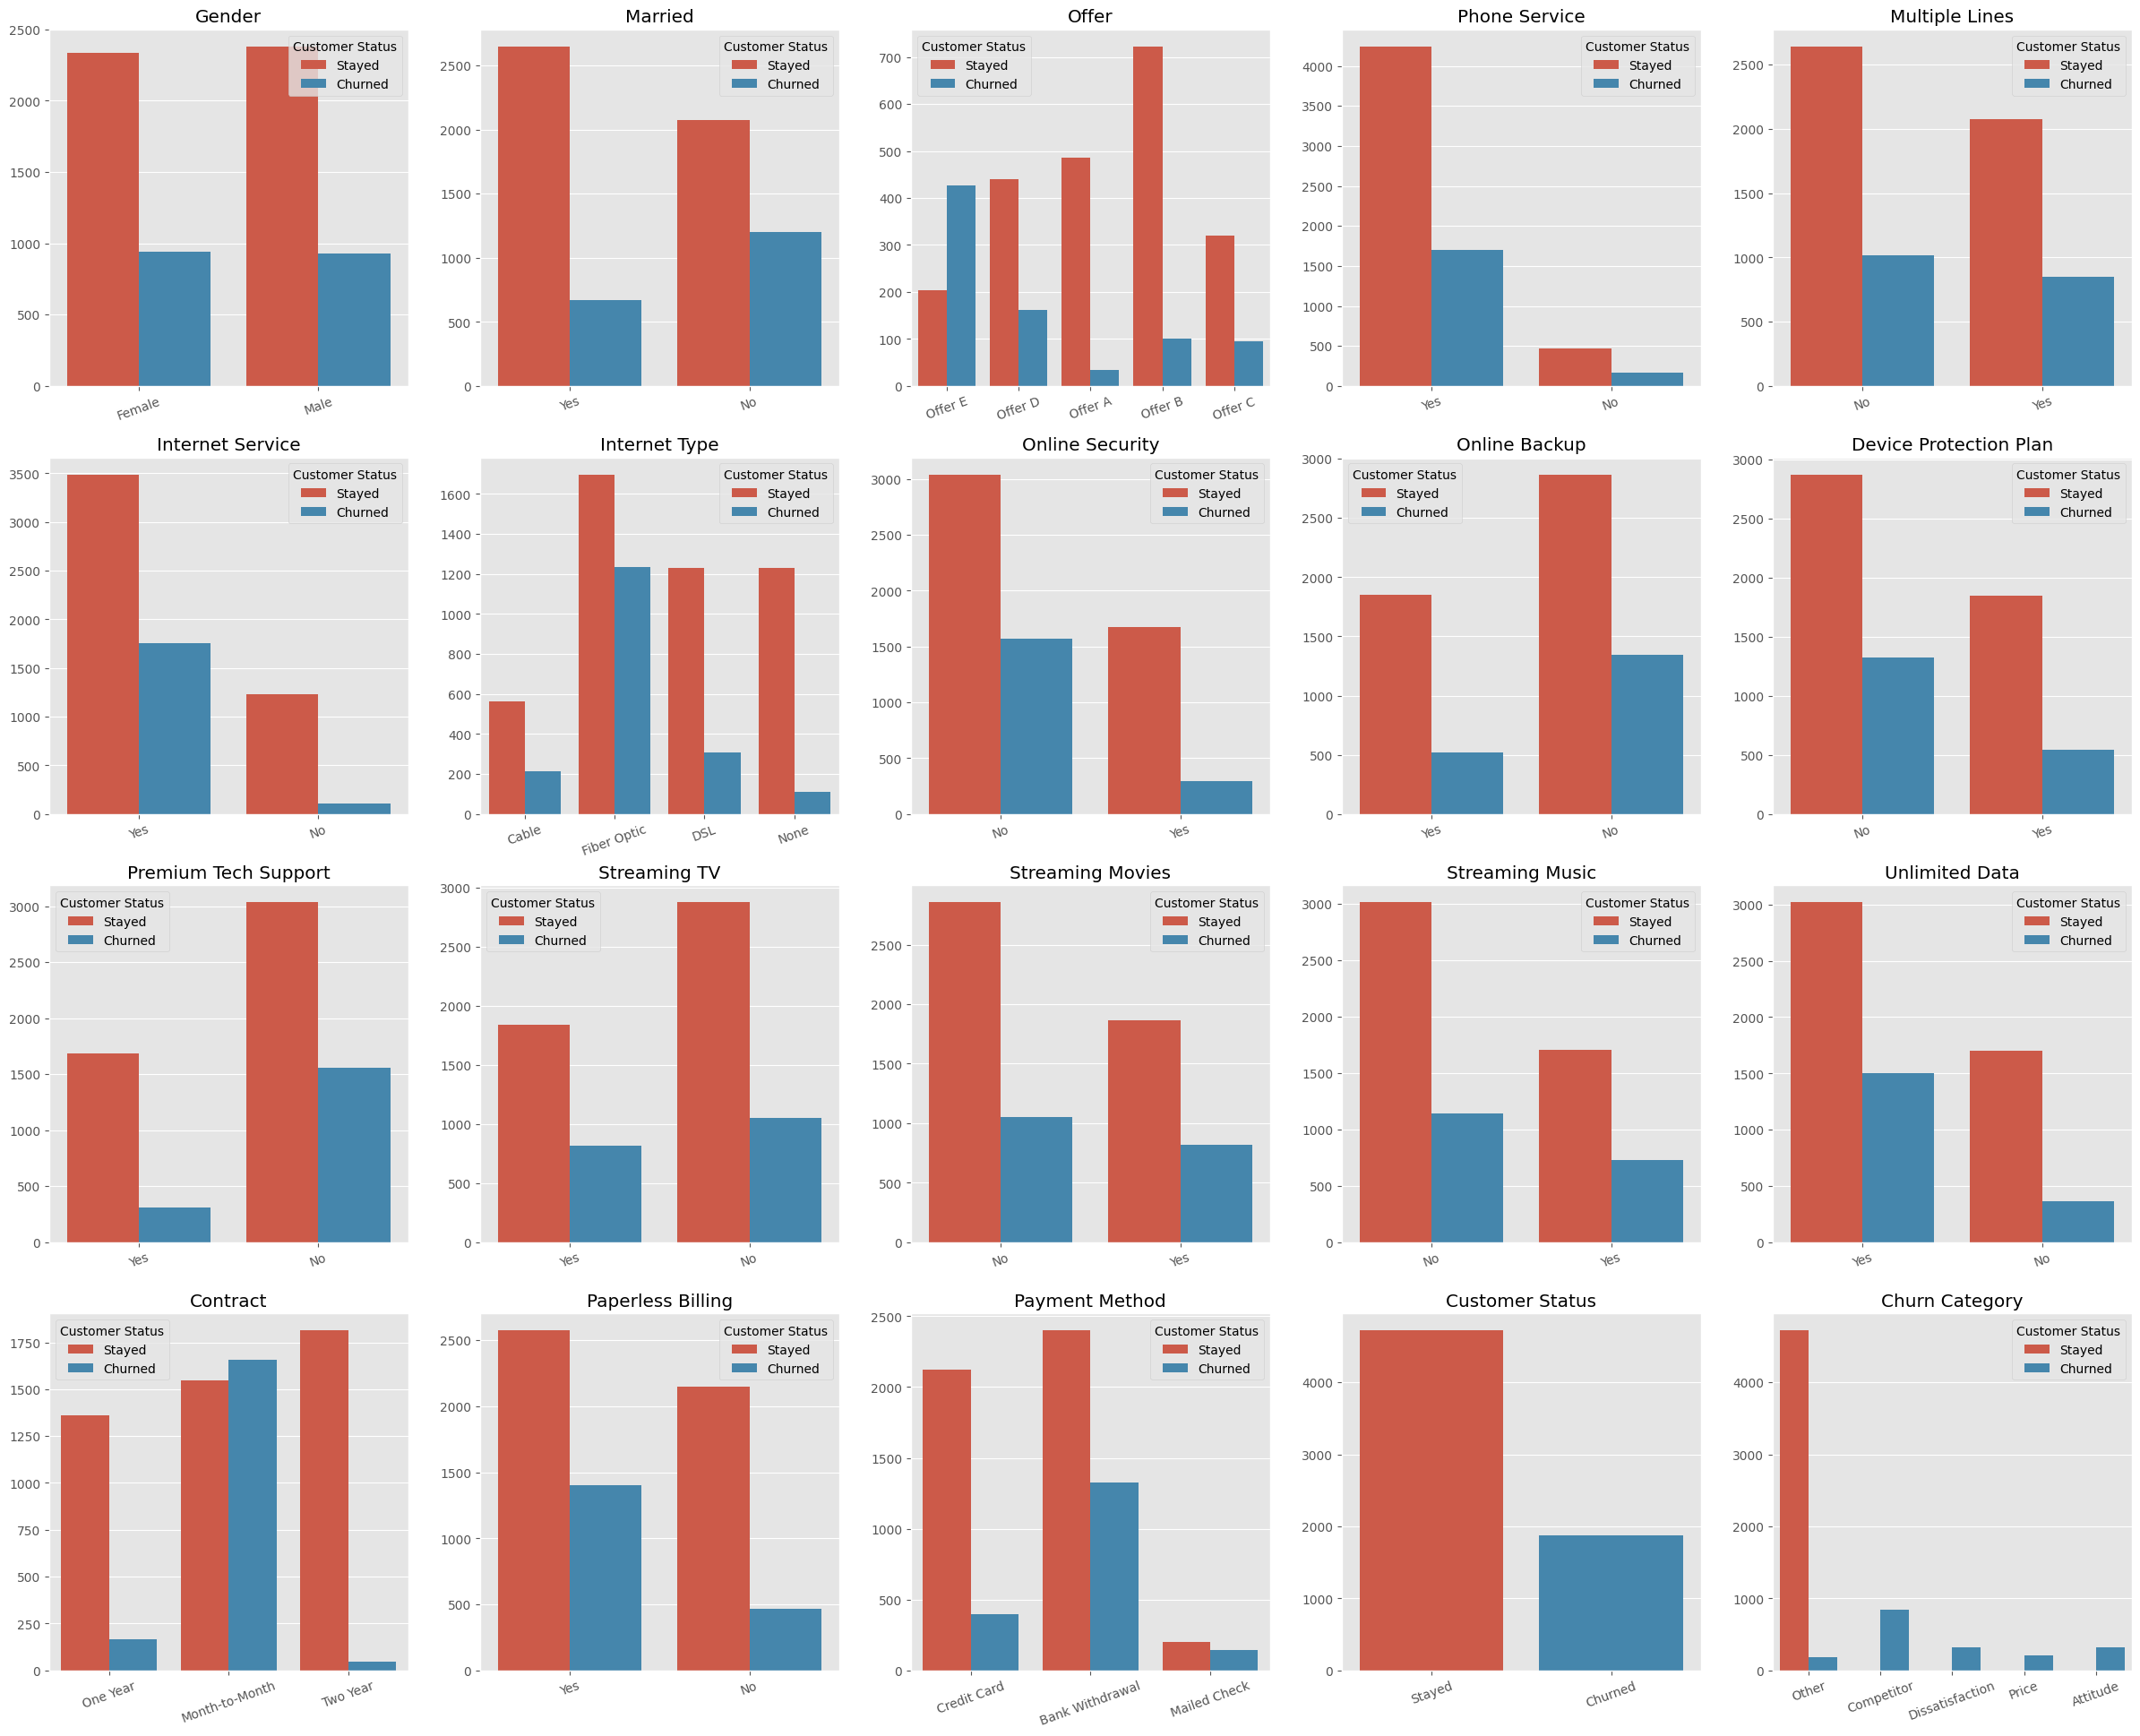

In [23]:
categorical = [column for column in churned.columns if churned[column].nunique() < 10 and churned[column].dtype == "object"]
churned_cat = churned[categorical]

fig = plt.figure(figsize = (30, 30))

i = 1
for c in churned_cat.columns:
    plt.subplot(5, 5, i)
    ax = sns.countplot(data = churned_cat, x = churned_cat[c], hue = 'Customer Status')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

**Insights**
- `Offer: `
  - Most customers did not accept marketing offers, indicating a low conversion rate.
  - The marketing team should focus on improving the acceptance rate of the offers to increase customer engagement and conversion.
  - High customer churn rate was observed after subscribing to Offer E, suggesting that this offer might not be meeting customer expectations or needs.

- `Internet Service: `
  - Subscriptions to internet service show a higher churn rate.
  - Potential causes related to internet services, such as slow internet connection, may contribute to customer dissatisfaction and churn.
  - Addressing internet service issues and improving the overall customer experience can help reduce churn in this segment.

- `Internet Type: `
  - Fiber Optic is the most popular internet connection type, offering faster download and upload speeds compared to cable and DSL.
  - Despite its popularity, Fiber Optic users have a higher likelihood of discontinuing the service, indicating the need to address any issues or concerns specific to Fiber Optic customers.

- `Contract :`
  - Longer contract timeframes, such as one or two years, discourage subscribers from discontinuing their service.
  - Users who opt for monthly payment plans are more likely to churn, possibly due to the lack of commitment or flexibility in their subscription.

- `Additional Internet Services :`
  - Subscribing to additional internet services (e.g., online security, backup, device protection) significantly reduces customer churn rate.
  - Offering and promoting these additional services can help retain customers by enhancing their overall experience and providing added value.

In [24]:
df_churned = churned.loc[churned['Customer Status'] == 'Churned']
df_stayed  = churned.loc[churned['Customer Status'] == 'Stayed']

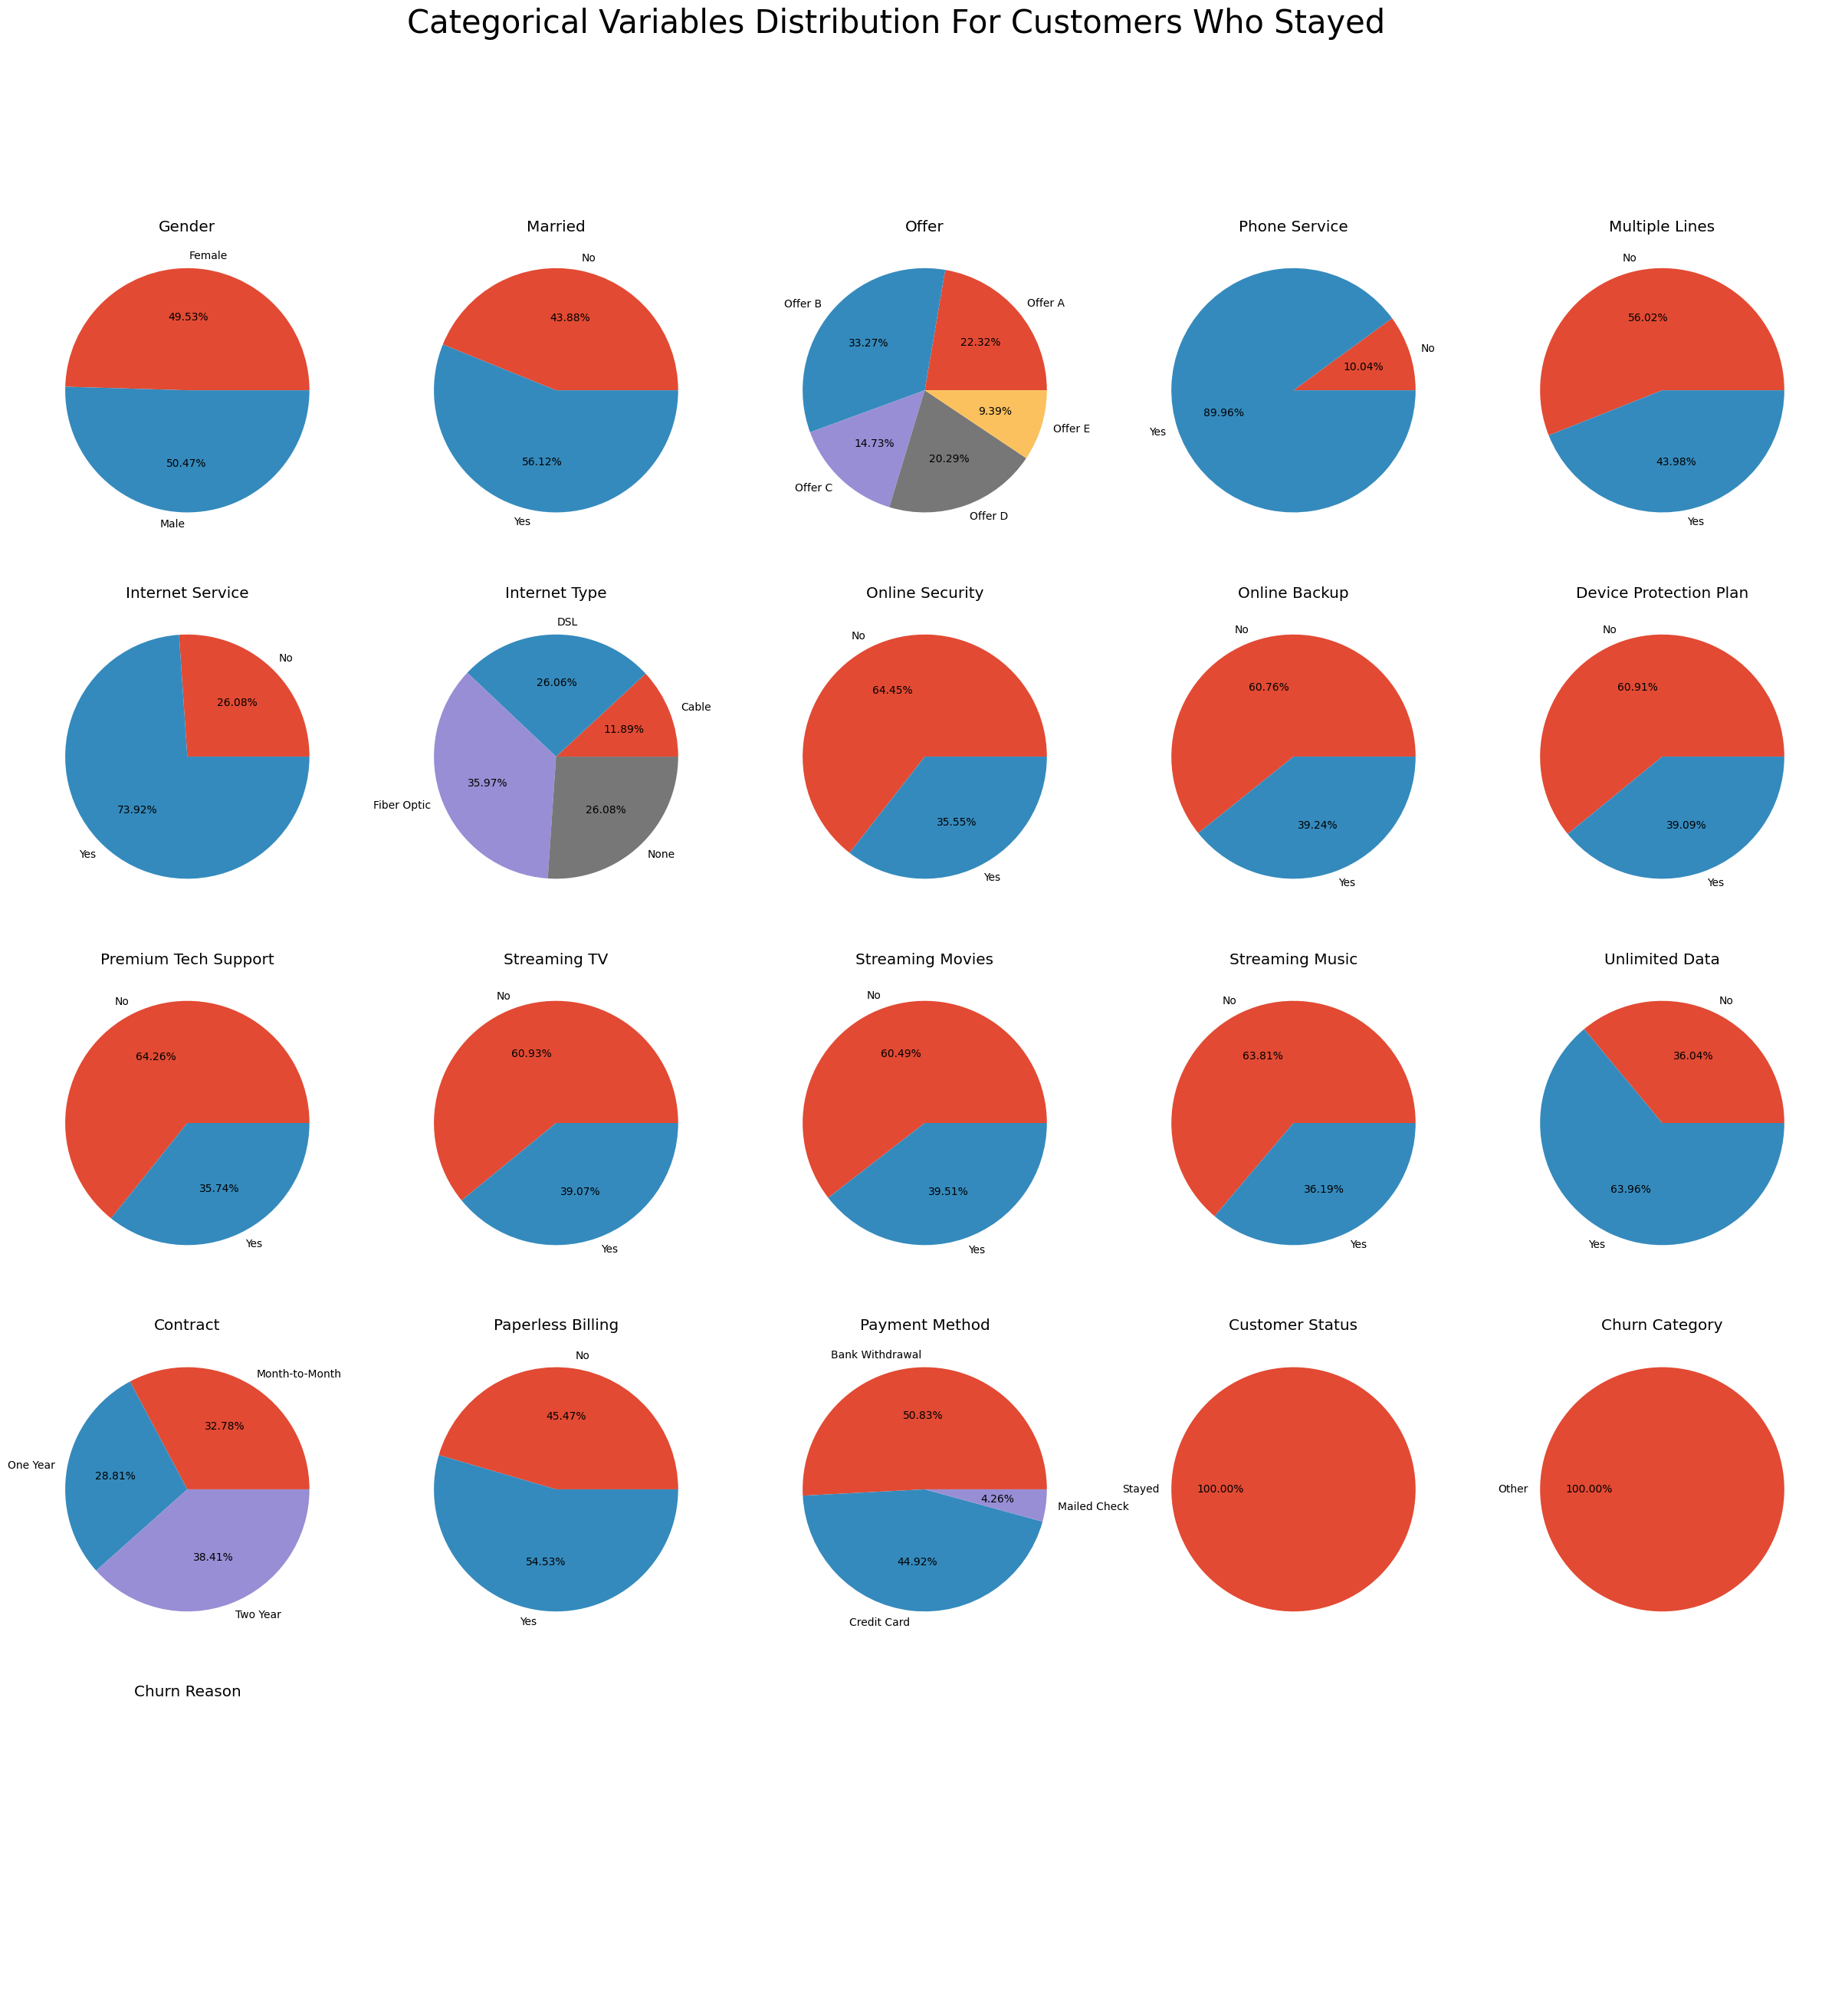

In [25]:
cat = [column for column in df_stayed.columns if df_stayed[column].nunique() < 10 and df_stayed[column].dtype == "object"]
df_categ = df_stayed[cat]

fig = plt.figure(figsize=(30, 30))

i = 1
for c in df_categ.columns:
    plt.subplot(5, 5, i)
    ax = df_stayed.groupby([c]).size().plot(kind='pie', autopct='%.2f%%')
    plt.title(str(c), loc='center')
    i += 1
fig.suptitle("Categorical Variables Distribution For Customers Who Stayed", fontsize=30)
plt.show()


**Insights**
- `67.73%` of high-value customers are `married`.
- They have `not purchased Offer E`.
- More than half of these customers have `subscribed to additional internet services and streaming services`.
- 81.66% of them `have long-term contracts`, with `50.39% opting for the two-year contract` and `31.27% choosing the one-year contract`.

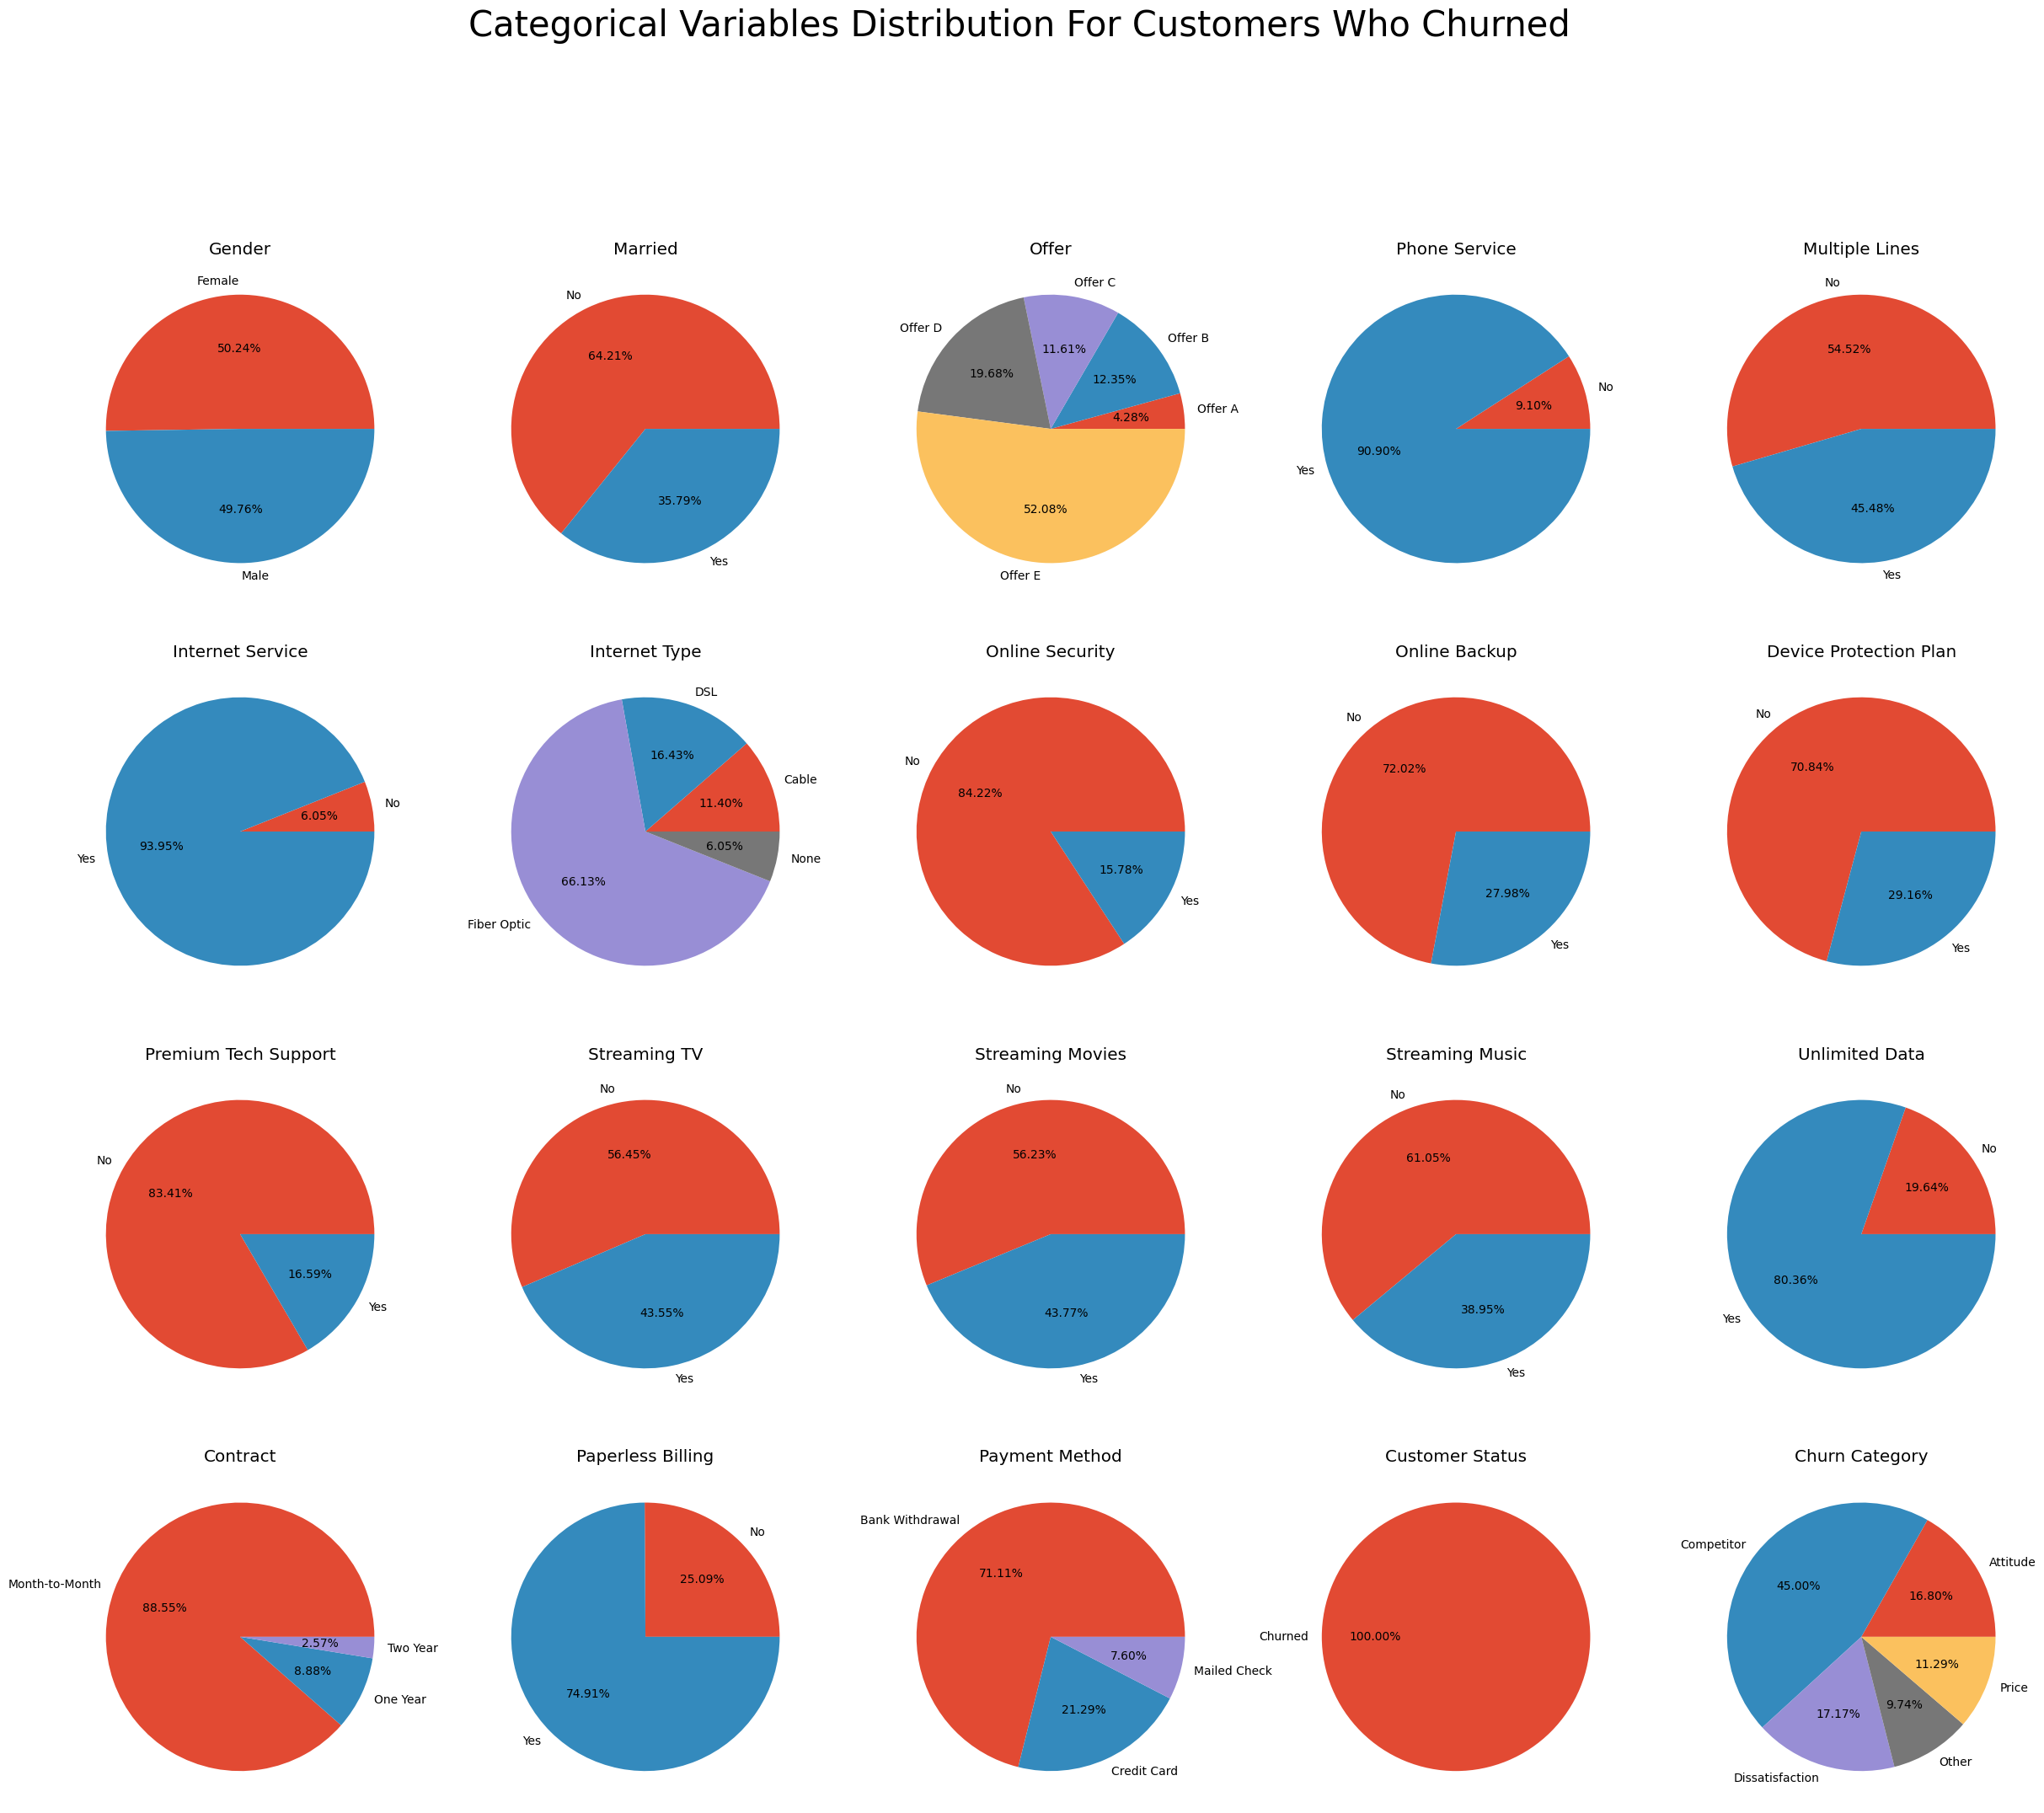

In [26]:
cat = [column for column in df_churned.columns if df_churned[column].nunique() < 10 and df_churned[column].dtype == "object"]
df_categ = df_churned[cat]

fig = plt.figure(figsize = (30, 30))

i = 1
for c in df_categ.columns:
    plt.subplot(5, 5, i)
    ax = df_churned.groupby([c]).size().plot(kind = 'pie', autopct = '%.2f%%')
    plt.title(str(c), loc='center')
    i += 1

fig.suptitle("Categorical Variables Distribution For Customers Who Churned", fontsize=30)
plt.show()


**Insights**
- Only `35.79%` of churned customers `are married`.
- `Offer E` appears to be the `most popular offer` among churned customers.
- More than half of churned customers have `not subscribed to additional internet services and streaming services`.
- `88.55%` of churned customers choose to `pay their bills on a monthly basis`.

In [27]:
# Concatenate the dataframes vertically (row-wise) using pd.concat()
data = pd.concat([df_stayed, df_churned], ignore_index=True)

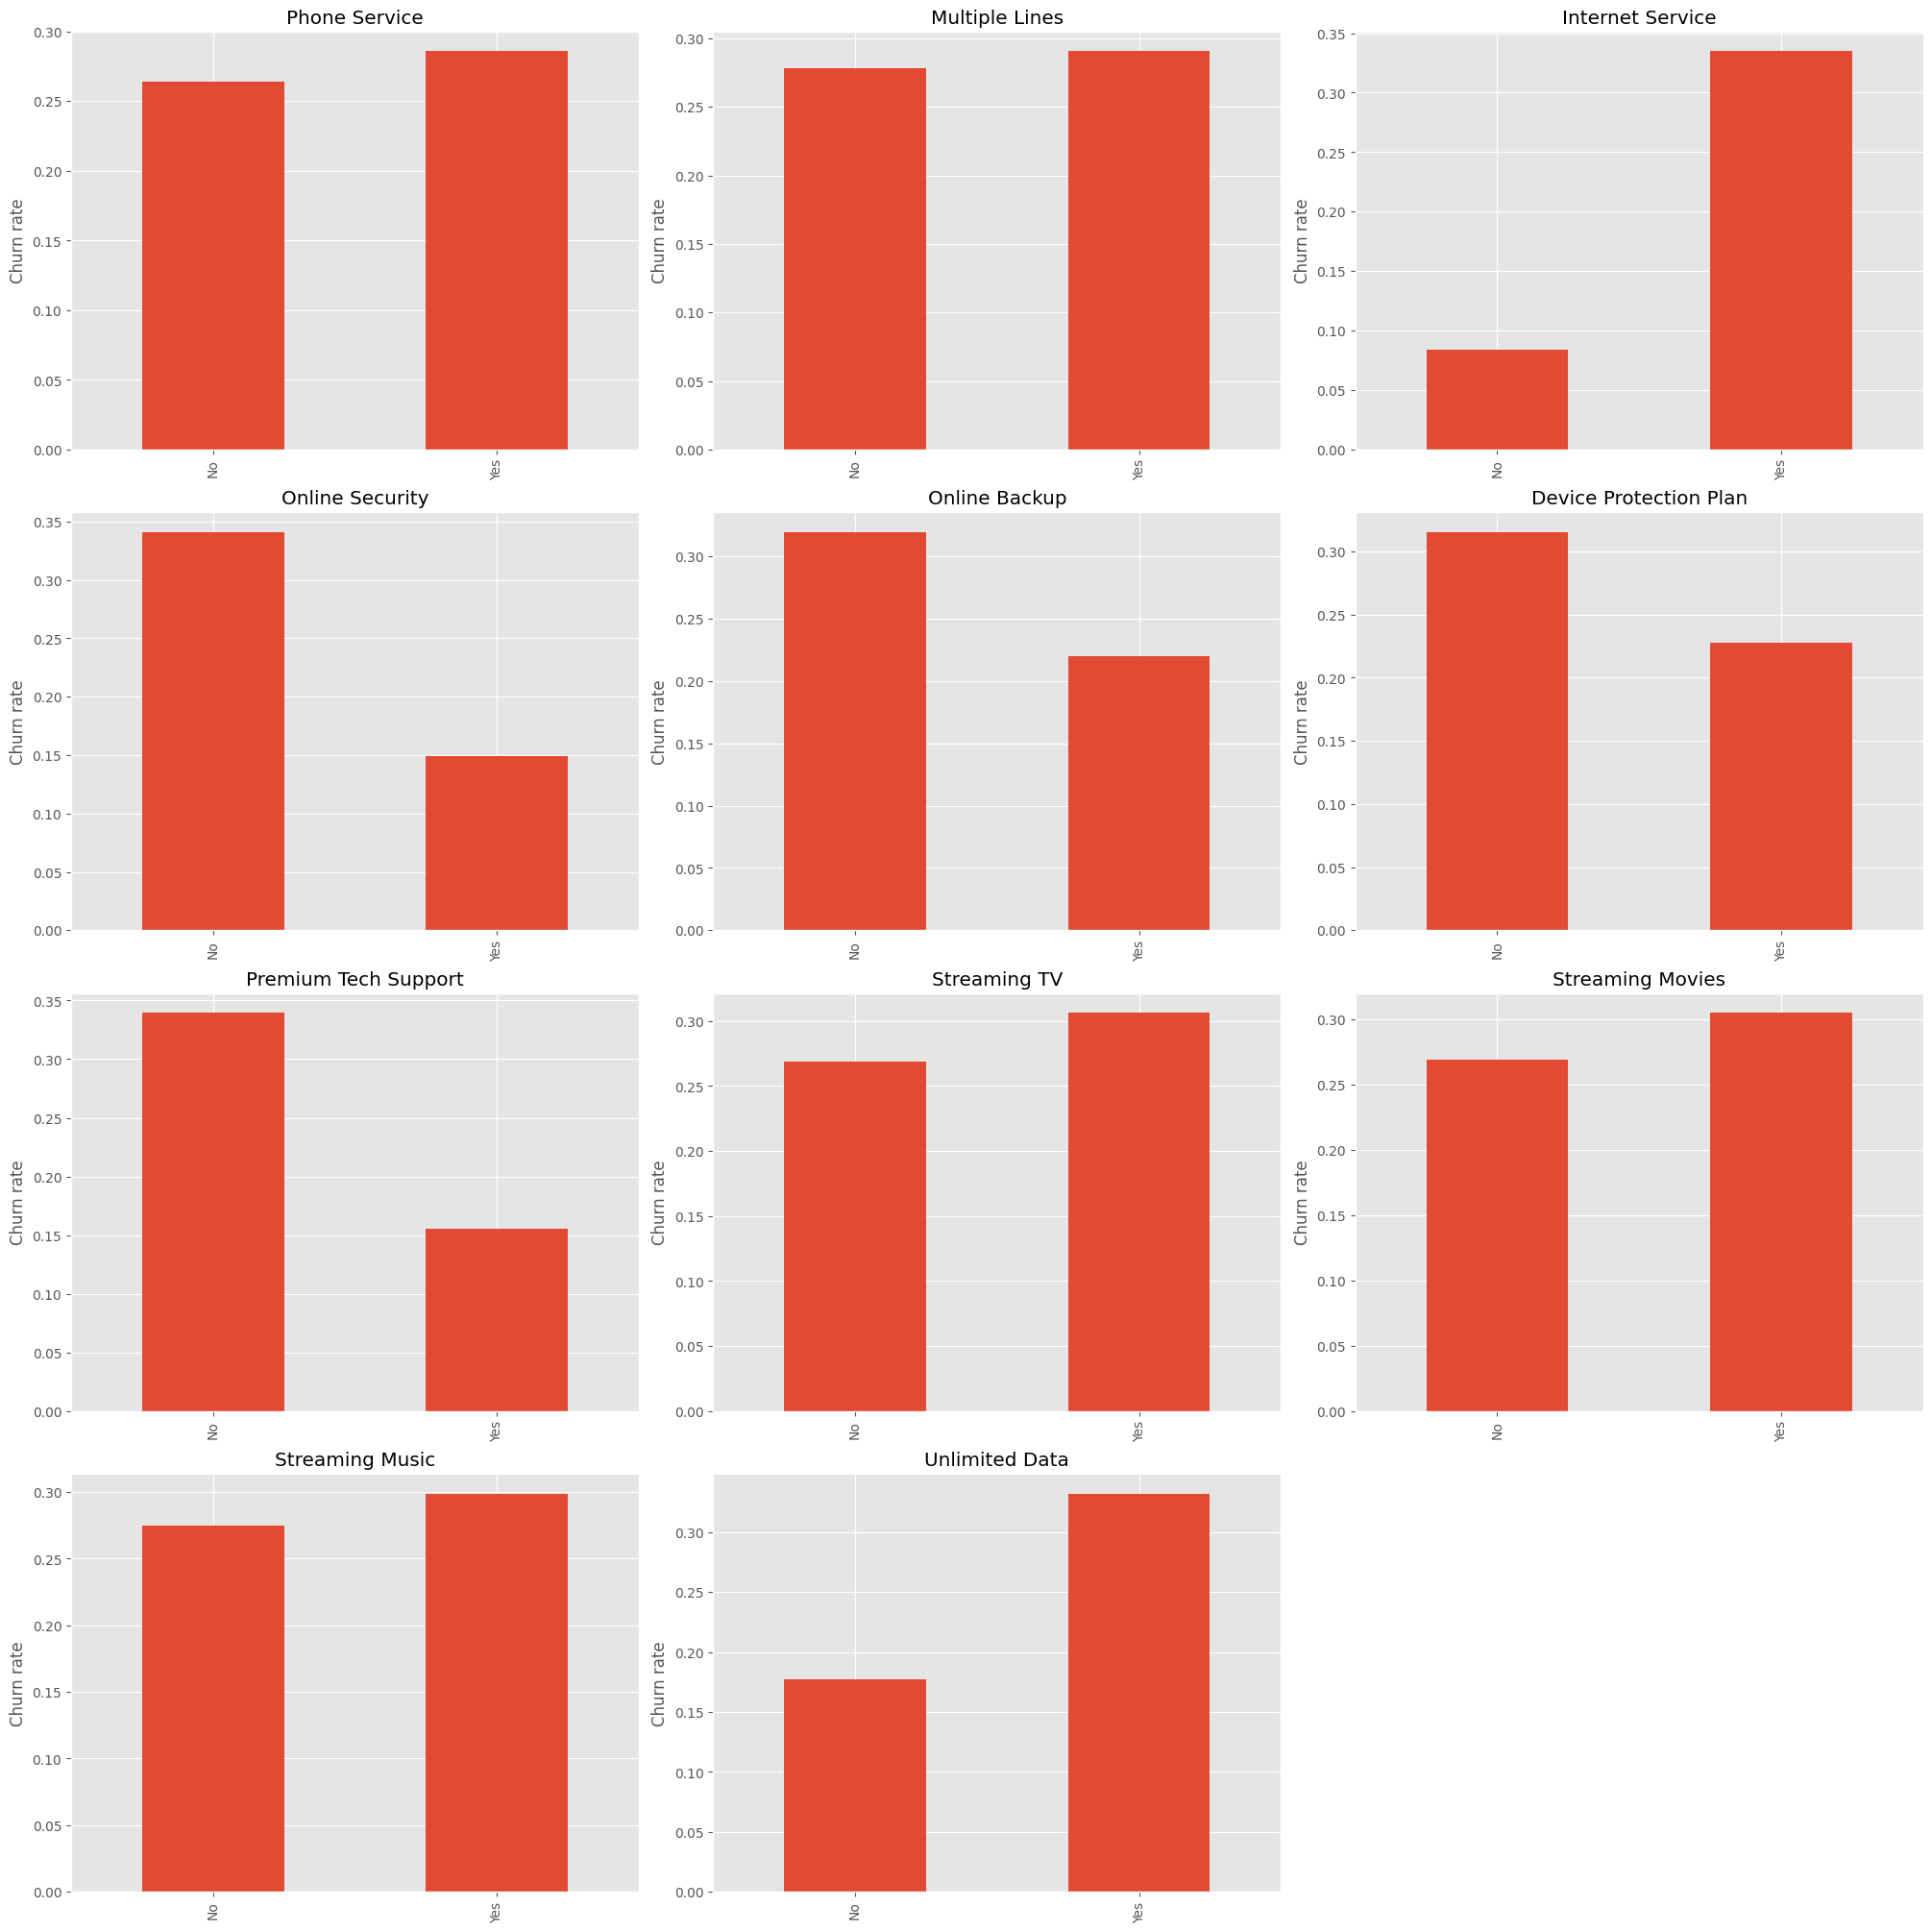

In [28]:
n_data = data.copy()
n_data['Churned'] = (n_data['Customer Status'] == 'Churned').astype(int)

services = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
            'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
            'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

# Calculate number of rows needed for plots
n = len(services)
ncols = 3  # number of columns of subplots
nrows = n // ncols + (n % ncols > 0)  # calculate number of rows needed

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*5), constrained_layout=True)
axs = axs.ravel()  # to flatten the array of axs

for i, service in enumerate(services):
    n_data.groupby(service)['Churned'].mean().plot(kind='bar', ax=axs[i])
    axs[i].set_ylabel('Churn rate')
    axs[i].set_title(service)
    axs[i].set_xlabel(None)

# remove unused subplots
for j in range(i+1, nrows*ncols):
    fig.delaxes(axs[j])

plt.show()

### **Hypothesis 1**
- Customers with longer subscription durations are less likely to churn.

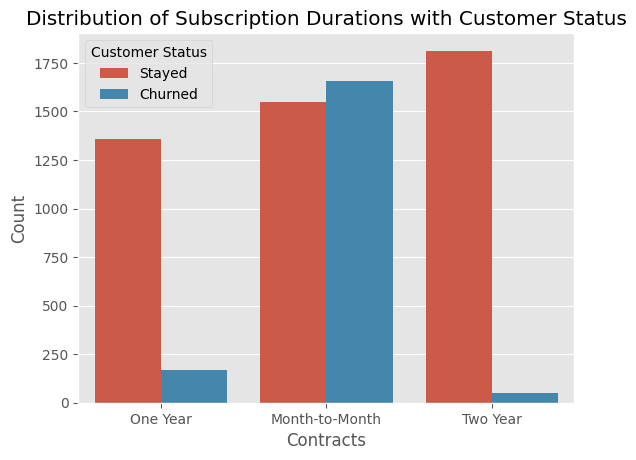

In [ ]:
sns.countplot(data=data, x='Contract', hue='Customer Status')
plt.xlabel('Contracts')
plt.ylabel('Count')
plt.title('Distribution of Subscription Durations with Customer Status')
plt.show()

- We can visually see that the majority of the churned customers purchased the monthly subscriptions.

### **Hypothesis 1 Test:**
- Conduct a t-test to compare the mean subscription durations of churned and active customers.

In [ ]:

# calculate the mean tenure for each group
grouped = data.groupby(['Customer Status', 'Contract'])['Tenure in Months'].mean()

# Conduct a t-test for each contract type
contract_types = data['Contract'].unique()

for contract in contract_types:
    active = data.loc[(data['Customer Status'] == 'Stayed') & (data['Contract'] == contract), 'Tenure in Months']
    churned = data.loc[(data['Customer Status'] == 'Churned') & (data['Contract'] == contract), 'Tenure in Months']

    t_stat, p_val = ttest_ind(active, churned, equal_var=False, nan_policy='omit')

    print(f"\nT-test results for {contract} contract:")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_val}")


T-test results for One Year contract:
t-statistic: -2.2912380929114327
p-value: 0.022943965825845975

T-test results for Month-to-Month contract:
t-statistic: 18.812287325134832
p-value: 7.020827607845855e-75

T-test results for Two Year contract:
t-statistic: -4.181747778825663
p-value: 0.00010410732171989667


`Hypothesis 1` supported for the `month-to-month contract customers` as they have lower mean tenure in months. So, they are the customers that are more likely to churn.

The mean tenure for churned customers is approximately 14 months and for active customers it is approximately 25 months. The positive t-statistic suggests that the mean tenure for active customers is higher than for churned customers. The p-value is extremely small (almost zero), indicating a statistically significant difference. This supports the hypothesis that customers with longer tenure are less likely to churn, for the month-to-month contract.


### **Hypothesis 2:**
- Customers with higher monthly billing amounts are more likely to churn.

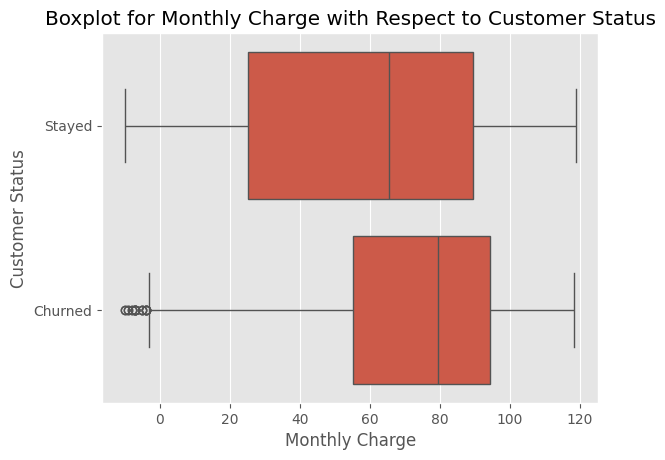

In [31]:
sns.boxplot(x='Monthly Charge', y='Customer Status', data=data)
plt.xlabel('Monthly Charge')
plt.ylabel('Customer Status')
plt.title('Boxplot for Monthly Charge with Respect to Customer Status')
plt.show()

#### **Hypothesis 2 Test:**
- Use a regression analysis to examine the relationship between monthly billing amount and churn.

In [32]:
# map 'Customer Status' to 0 for 'Stayed', 1 for 'Churned'
# n_data = data.copy()
n_data['Customer Status'] = n_data['Customer Status'].map({'Stayed': 0, 'Churned': 1})

# select feature and target
X = n_data[['Monthly Charge']]
y = n_data['Customer Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regression = LogisticRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

# print the model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.723823975720789


The accuracy of the logistic regression model used to test the `hypothesis 2` "Customers with higher monthly billing amounts are more likely to churn" is `approximately 72.4%`.
- Accuracy is a measure of how often the model correctly predicted whether a customer churned or not, given the monthly billing amount.

The accuracy score indicates that in about 72.4% of the cases, the model accurately predicted the customer's churn status based on their monthly charge. Therefore, there seems to be a correlation between the monthly billing amount and customer churn, providing some support for the hypothesis.

### **Using Statsmodel api for Hypothesis 2 Testing**

In [34]:
# Add an intercept (also known as a constant) to our model
n_data['intercept'] = 1

# Define the logistic regression model
logit_mod = sm.Logit(n_data['Customer Status'], n_data[['Monthly Charge', 'intercept']])

# Fit the model to the data
results = logit_mod.fit()

# Print the model summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.581757
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Customer Status   No. Observations:                 6589
Model:                          Logit   Df Residuals:                     6587
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.02451
Time:                        16:43:32   Log-Likelihood:                -3833.2
converged:                       True   LL-Null:                       -3929.5
Covariance Type:            nonrobust   LLR p-value:                 8.646e-44
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Monthly Charge     0.0127      0.001     13.485      0.000       0.011       0.015
intercept        

The model verifies the `hypothesis 2` that customers with higher monthly billing amounts are more likely to churn.

Let's look at the coefficient of the `'MonthlyCharge'` variable in the model summary.

- The coefficient for 'MonthlyCharge' is 0.0127 and the p-value is 0.000.
- The positive coefficient suggests that an increase in the 'MonthlyCharge' variable (i.e., higher monthly billing amounts) is associated with an increase in the log-odds of churn, indicating that customers with higher monthly billing amounts are indeed more likely to churn, as per hypothesis.

Additionally, the `p-value is less than 0.05` (in fact, it's 0.000), indicating that this effect is statistically significant.

# **Predictive Modelling**
- Logistic Regression
- Random Forest Model

## **Data Preparation**

In [35]:
# Columns to be updated
binary_columns = [
    'Paperless Billing', 'Unlimited Data',
    'Streaming Movies', 'Streaming Music',
    'Streaming TV', 'Premium Tech Support',
    'Device Protection Plan', 'Online Backup',
    'Online Security', 'Multiple Lines',
    'Married', 'Phone Service', 'Internet Service'
    ]
# Iterate over each column
for column in binary_columns:
    # Replace 'No' with 0 and 'Yes' with 1
    data[column].replace({'No': 0, 'Yes': 1}, inplace=True)

/tmp/ipykernel_33422/88020517.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace({'No': 0, 'Yes': 1}, inplace=True)
/tmp/ipykernel_33422/88020517.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column].replace({'No': 0, 'Yes': 1}, inplace=True)


In [ ]:

data.replace({"Gender":{'Female':0,'Male':1}},inplace=True)
data.replace({'Payment Method':{'Credit Card': 0, 'Bank Withdrawal': 1, 'Mailed Check':2}},inplace=True)
data.replace({'Contract':{'Month-to-Month': 0, 'One Year': 1, 'Two Year':2}},inplace=True)
data.replace({'Internet Type':{'None':0,'Fiber Optic': 1, 'DSL':2, 'Cable':3}},inplace=True)
data.replace({'Offer':{'None':0,'Offer A': 1, 'Offer B':2, 'Offer C':3, 'Offer D':4, 'Offer E': 5}},inplace=True)

/tmp/ipykernel_33422/2383809391.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Gender":{'Female':0,'Male':1}},inplace=True)
/tmp/ipykernel_33422/2383809391.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Payment Method':{'Credit Card': 0, 'Bank Withdrawal': 1, 'Mailed Check':2}},inplace=True)
/tmp/ipykernel_33422/2383809391.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_obj

In [37]:
data.drop(['Customer ID','Total Refunds',
           'City','Zip Code','Latitude',
           'Longitude','Churn Category',
           'Churn Reason'],axis='columns',inplace=True)

In [38]:
# label Encoding
encoder = LabelEncoder()
data['Customer Status'] = encoder.fit_transform(data['Customer Status'])

In [39]:
# Define columns that need to be scaled
columns_to_scale = [
    'Age','Number of Dependents',
    'Number of Referrals','Tenure in Months',
    'Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download','Monthly Charge',
    'Total Charges','Total Extra Data Charges',
    'Total Long Distance Charges','Total Revenue'
    ]
# Instantiate the scaler
scaler = MinMaxScaler()

# Apply the scaler to the columns specified in the dataframe
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [40]:
data.dropna(inplace=True)

In [41]:
X = data.drop('Customer Status',axis='columns')
y = data['Customer Status']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [43]:
# Calculate total data points
total_data = len(X_train) + len(X_test)

# Calculate percentage split for train and test data
train_percent = len(X_train) / total_data * 100
test_percent = len(X_test) / total_data * 100

print(f"Training set - X: {X_train.shape}, y: {y_train.shape}, {train_percent:.2f}% of total data")
print(f"Testing set - X: {X_test.shape}, y: {y_test.shape}, {test_percent:.2f}% of total data")

Training set - X: (2392, 29), y: (2392,), 79.97% of total data
Testing set - X: (599, 29), y: (599,), 20.03% of total data


### **Resampling Data**

In [44]:
# Instantiate the SMOTE resampler
smote = SMOTE()

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Before resampling:
Customer Status
1    1729
0     663
Name: count, dtype: int64
After resampling:
Customer Status
1    1729
0    1729
Name: count, dtype: int64


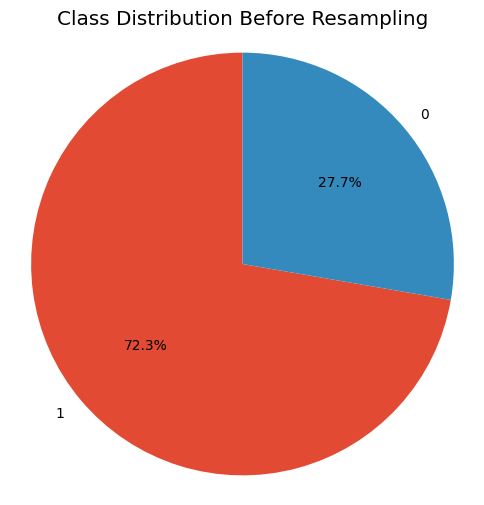

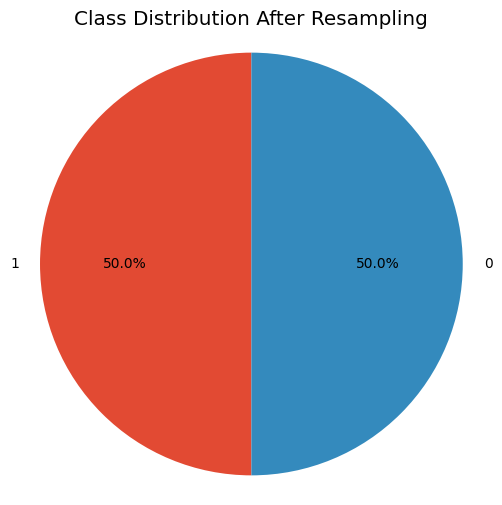

In [45]:
# Print the value counts of classes in the training set
print("Before resampling:")
print(y_train.value_counts())

print("After resampling:")
print(y_train_resampled.value_counts())

# Plot the pie chart of class distribution before resampling
plt.figure(figsize=(6, 6))
plt.title("Class Distribution Before Resampling")
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

# Plot the pie chart of class distribution after resampling
plt.figure(figsize=(6, 6))
plt.title("Class Distribution After Resampling")
plt.pie(y_train_resampled.value_counts(), labels=y_train_resampled.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [46]:
X_train, y_train = X_train_resampled, y_train_resampled #renaming the variables to resampled data

## **Logistic Regression**

In [47]:
# Instantiate the model
logreg = LogisticRegression(max_iter=1000)

In [ ]:
# Fit the model on training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
# Predict the labels on test data
y_pred = logreg.predict(X_test)

In [ ]:
# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8180300500834724
Precision: 0.9396325459317585
Recall: 0.8063063063063063
F1 Score: 0.8678787878787879


Confusion Matrix: 
[[132  23]
 [ 86 358]]


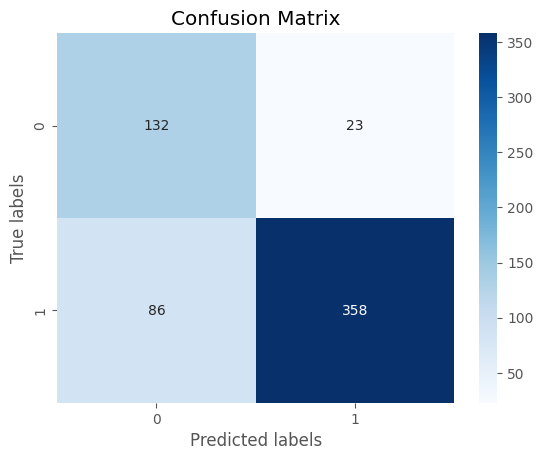

In [51]:
# Assuming you have defined y_test and y_pred
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{confusion_mat}")

# Plotting the confusion matrix using seaborn's heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

The Logistic Regression model achieved a higher accuracy of 0.826, indicating improved overall predictive performance. The precision score of 0.94 indicates a high proportion of true positive predictions among all predicted positive instances. The recall score of 0.81 suggests the model's ability to capture a substantial number of actual positive instances. The F1 score of 0.87 represents a balance between precision and recall.

## **Random Forest Model**

In [52]:
# Instantiate the model
rf_classifier = RandomForestClassifier()
# Fit the model on training data
rf_classifier.fit(X_train, y_train)
# Predict the labels on test data
y_pred = rf_classifier.predict(X_test)
# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8597662771285476
Precision: 0.9147465437788018
Recall: 0.8941441441441441
F1 Score: 0.9043280182232346


In [53]:
# Fit the model on training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
# Predict the labels on test data
y_pred = rf_classifier.predict(X_test)

In [55]:
# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8580968280467446
Precision: 0.9126436781609195
Recall: 0.8941441441441441
F1 Score: 0.9032992036405005


Confusion Matrix: 
[[117  38]
 [ 47 397]]


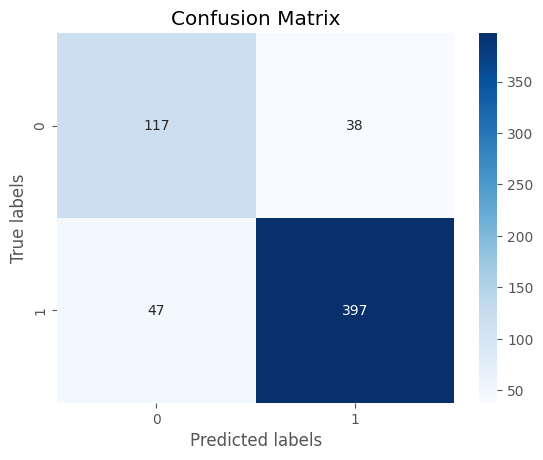

In [56]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{confusion_mat}")

# Plot the confusion matrix using seaborn's heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_
# Getting the feature names
feature_names = X_train.columns
# Create a Series to hold the feature importances and their corresponding feature names
importances = pd.Series(feature_importances, index=feature_names)
# Sort the feature importances in descending order and select the top 10
top_15_importances = importances.sort_values(ascending=False).head(15)

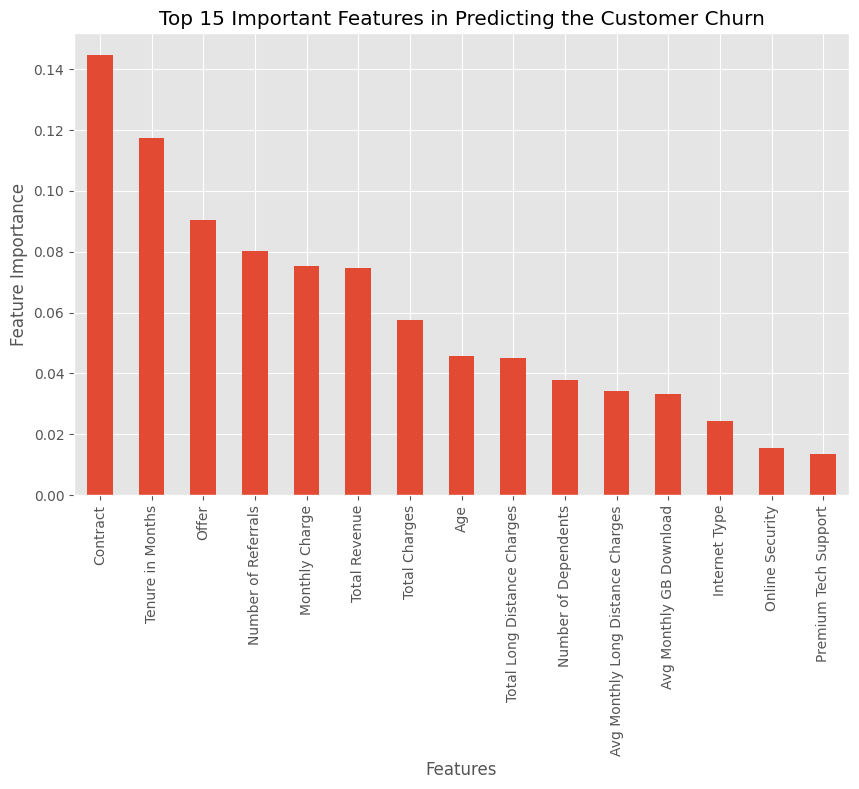

In [58]:
# Plotting
plt.figure(figsize=(10,6))
top_15_importances.plot(kind='bar')
plt.title('Top 15 Important Features in Predicting the Customer Churn')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

# **Conclusions**

Machine learning models can accurately identify and leverage the data by incorporating them as features in the predictive models. By considering these features, the models can learn the relationships between the predictors and churn, thereby making more accurate predictions. So we can say; Random Forest can be effective machine learning techniques for predicting customer churn in a business setting. So, machine learning models can successfully identify and predict customer churn, enabling businesses to take proactive measures to retain customers and improve customer satisfaction.


## **Recommendations**
Based on the analysis, here are some recommendations:
- **`Focus on High-Value Customers:`** Company should direct thier marketing resources towards the top third of their customer base, who are identified as substantial spenders and are loyal to our brand. For these customers, an exclusive loyalty program could be designed, providing them with unique benefits and rewards.

- **`Establish a competitive advantage`** Customers are willing to invest in quality products and services. To prevent customer churn, it is crucial to meet their expectations consistently and provide superior offerings compared to competitors.


- **`Promote Long-Term Subscriptions:`** The data shows that transitioning month-to-month users to long-term contractual subscribers can effectively decrease churn rates. Thus, company should promote the benefits of long-term subscriptions, illustrating the added value they provide.

- **`Upsell Internet and Streaming Services:`** Customers using the internet services have shown a propensity to become high-value customers when they purchase additional internet and streaming services. company should consider devising strategies to promote these add-ons to thier existing internet user base.

- **`Re-evaluate Offer E:`** The analysis shows that Offer E has a high churn rate. We recommend conducting a detailed assessment of this offer to identify potential issues. By comparing it with other successful offerings, company could make necessary modifications to enhance its performance.
- **`Be proactive in preventing churn:`** Regularly conduct surveys to identify early signs of customer churn among loyal customers. Make customers feel valued and heard by involving them in the company's decision-making process. Use survey feedback to design better service plans that cater to their specific needs and preferences.

OTHER MODELS Explored Below

## **Support Vector Machine (SVM)**

Accuracy: 0.8247078464106845
Precision: 0.937984496124031
Recall: 0.8175675675675675
F1 Score: 0.8736462093862816


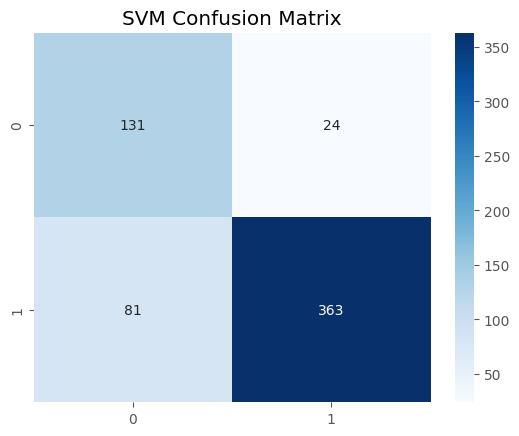

In [59]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion_mat_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

## **K-Nearest Neighbors (KNN)**

Accuracy: 0.7679465776293823
Precision: 0.9178082191780822
Recall: 0.7545045045045045
F1 Score: 0.8281829419035847


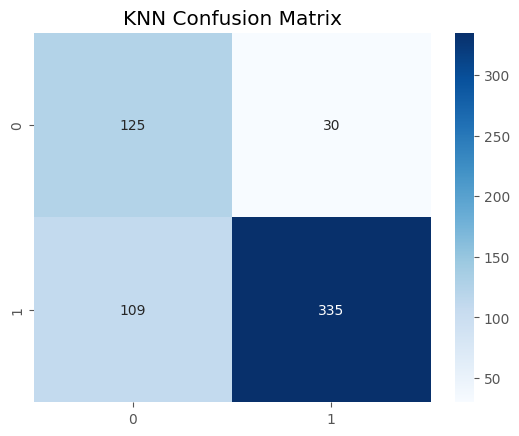

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confusion_mat_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()

## **Gradient Boosting Classifier**

Accuracy: 0.8580968280467446
Precision: 0.9367396593673966
Recall: 0.8671171171171171
F1 Score: 0.9005847953216374


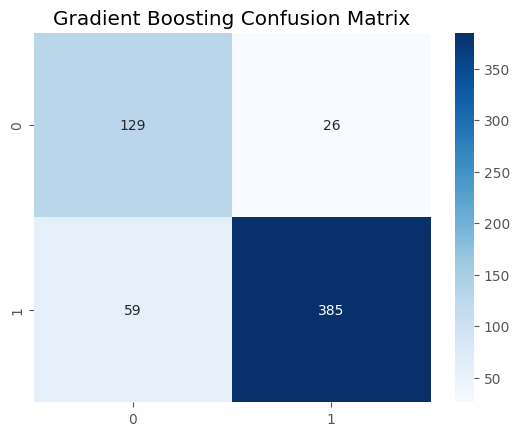

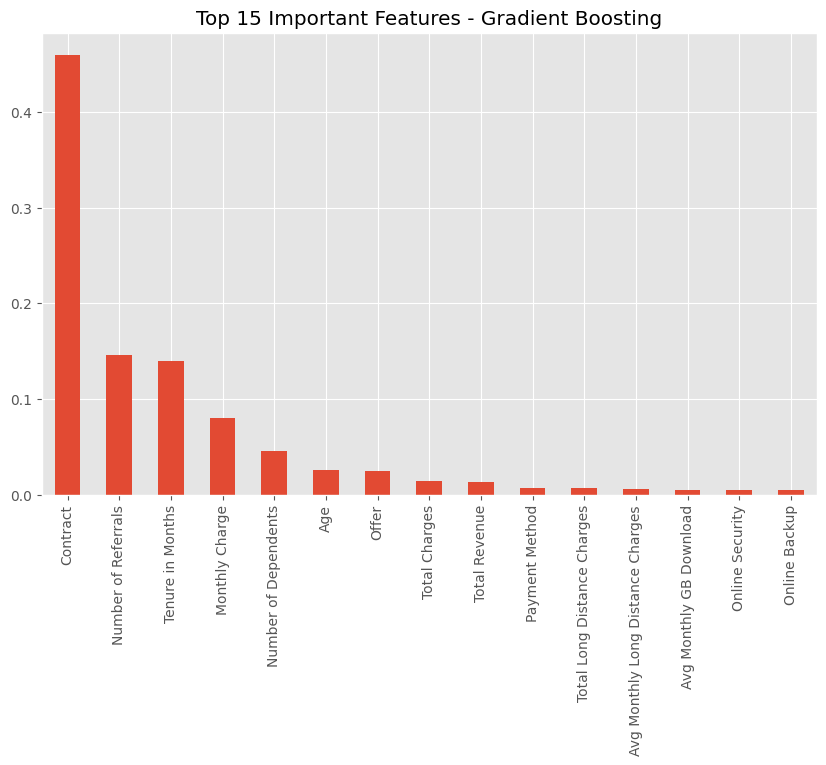

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(confusion_mat_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

# Feature Importance
feature_importances_gb = gb_model.feature_importances_
importances_gb = pd.Series(feature_importances_gb, index=X_train.columns).sort_values(ascending=False)
top_15_importances_gb = importances_gb.head(15)

# Plot
plt.figure(figsize=(10,6))
top_15_importances_gb.plot(kind='bar')
plt.title('Top 15 Important Features - Gradient Boosting')
plt.show()

## **XGBoost**

Accuracy: 0.8564273789649416
Precision: 0.9143518518518519
Recall: 0.8896396396396397
F1 Score: 0.9018264840182648


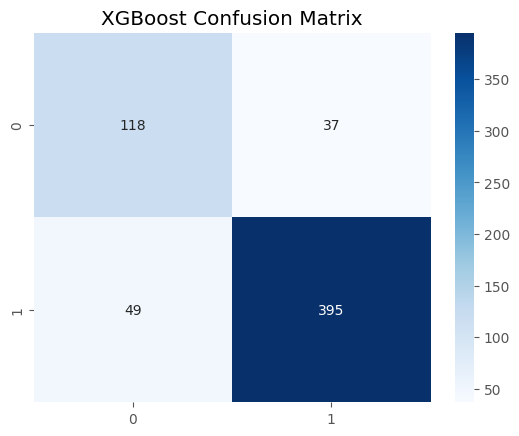

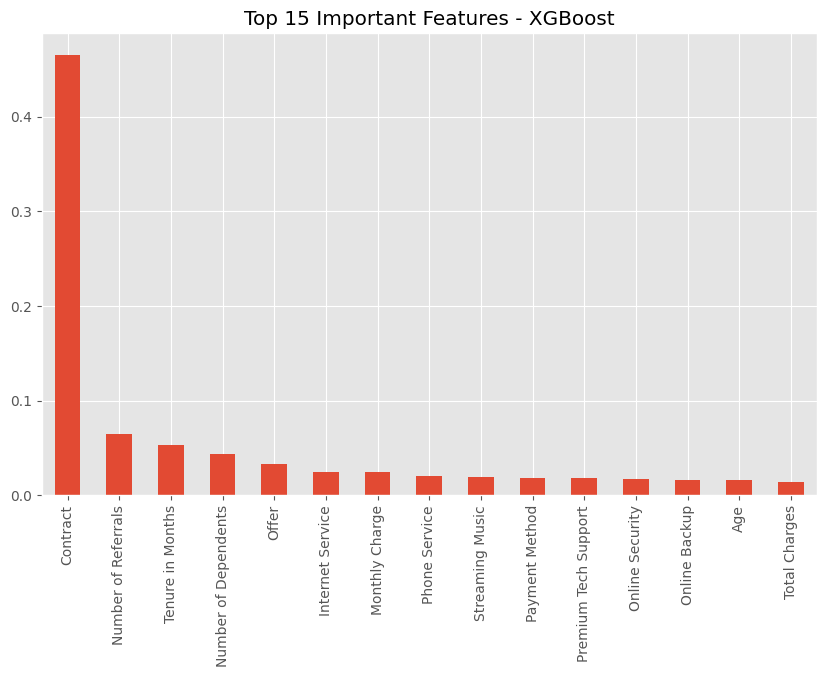

In [62]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(confusion_mat_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Feature Importance
feature_importances_xgb = xgb_model.feature_importances_
importances_xgb = pd.Series(feature_importances_xgb, index=X_train.columns).sort_values(ascending=False)
top_15_importances_xgb = importances_xgb.head(15)

# Plot
plt.figure(figsize=(10,6))
top_15_importances_xgb.plot(kind='bar')
plt.title('Top 15 Important Features - XGBoost')
plt.show()

## **Naive Bayes**

Accuracy: 0.7829716193656093
Precision: 0.9220430107526881
Recall: 0.7725225225225225
F1 Score: 0.8406862745098039


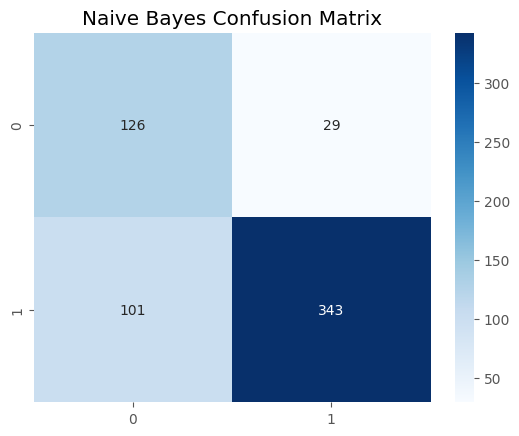

In [63]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
confusion_mat_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(confusion_mat_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

## **Decision Tree Classifier**

Accuracy: 0.8196994991652755
Precision: 0.8962264150943396
Recall: 0.8558558558558559
F1 Score: 0.8755760368663594


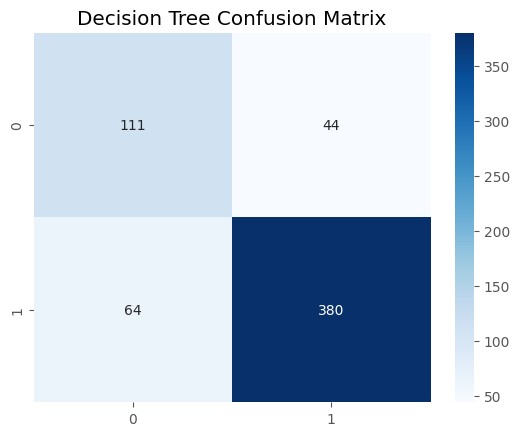

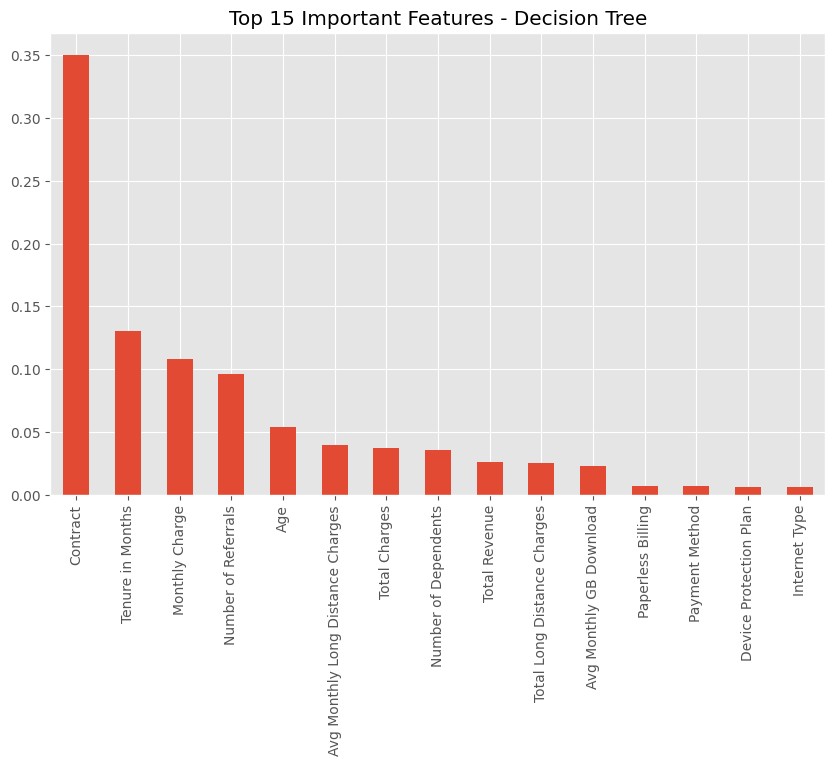

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(confusion_mat_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Feature Importance
feature_importances_dt = dt_model.feature_importances_
importances_dt = pd.Series(feature_importances_dt, index=X_train.columns).sort_values(ascending=False)
top_15_importances_dt = importances_dt.head(15)

# Plot
plt.figure(figsize=(10,6))
top_15_importances_dt.plot(kind='bar')
plt.title('Top 15 Important Features - Decision Tree')
plt.show()

## **Deep Learning Model (Neural Network)**

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Scale the data for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6872 - loss: 0.5722 - val_accuracy: 0.8247 - val_loss: 0.4101
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8390 - loss: 0.3731 - val_accuracy: 0.8331 - val_loss: 0.3938
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8629 - loss: 0.3356 - val_accuracy: 0.8264 - val_loss: 0.3861
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8772 - loss: 0.3032 - val_accuracy: 0.8347 - val_loss: 0.3939
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8712 - loss: 0.2931 - val_accuracy: 0.8297 - val_loss: 0.3706
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.2855 - val_accuracy: 0.8431 - val_loss: 0.3710
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8787 - loss: 0.2865 - val_accuracy: 0.8514 - val_loss: 0.3433
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8977 - loss: 0.2728 - val_accuracy: 0.

In [71]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8289 - loss: 0.4341
Accuracy: 0.8430717587471008


In [72]:
y_pred_dl = (model.predict(X_test_scaled) > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [73]:
# Metrics
precision = precision_score(y_test, y_pred_dl)
recall = recall_score(y_test, y_pred_dl)
f1 = f1_score(y_test, y_pred_dl)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9247572815533981
Recall: 0.8581081081081081
F1 Score: 0.8901869158878505


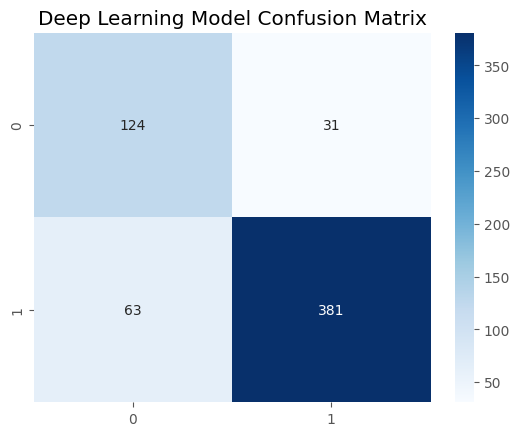

In [74]:
# Confusion Matrix
confusion_mat_dl = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(confusion_mat_dl, annot=True, fmt='d', cmap='Blues')
plt.title('Deep Learning Model Confusion Matrix')
plt.show()